In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


Define Paths and Configuration

In [3]:
# Define paths
PROCESSED_DATA_PATH = '/content/drive/MyDrive/brain-tumor-classification/data/processed'

# Configuration
TUMOR_CLASSES = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
SPLITS = ['Training', 'Testing']

# Color palette for visualizations
CLASS_COLORS = {
    'glioma_tumor': '#FF6B6B',
    'meningioma_tumor': '#4ECDC4',
    'no_tumor': '#95E1D3',
    'pituitary_tumor': '#FFA07A'
}

print(f"Processed Data Path: {PROCESSED_DATA_PATH}")
print(f"Classes: {TUMOR_CLASSES}")
print(f"Splits: {SPLITS}")

Processed Data Path: /content/drive/MyDrive/brain-tumor-classification/data/processed
Classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Splits: ['Training', 'Testing']


 Load Dataset Information

In [4]:
def load_dataset_info():
    """
    Load information about all images in the dataset
    """
    dataset_info = []

    for split in SPLITS:
        split_path = os.path.join(PROCESSED_DATA_PATH, split)

        if not os.path.exists(split_path):
            print(f"Warning: {split} folder not found!")
            continue

        for class_name in TUMOR_CLASSES:
            class_path = os.path.join(split_path, class_name)

            if not os.path.exists(class_path):
                print(f"Warning: {class_name} folder not found in {split}!")
                continue

            # Get all image files
            image_files = [f for f in os.listdir(class_path)
                          if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

            print(f"Loading info from {split}/{class_name}: {len(image_files)} images")

            for img_file in tqdm(image_files, desc=f"  Processing {class_name}"):
                img_path = os.path.join(class_path, img_file)

                # Read image to get properties
                img = cv2.imread(img_path)

                if img is not None:
                    height, width, channels = img.shape
                    file_size = os.path.getsize(img_path) / 1024  # Size in KB

                    # Calculate basic statistics
                    mean_intensity = np.mean(img)
                    std_intensity = np.std(img)
                    min_intensity = np.min(img)
                    max_intensity = np.max(img)

                    dataset_info.append({
                        'split': split,
                        'class': class_name,
                        'filename': img_file,
                        'path': img_path,
                        'width': width,
                        'height': height,
                        'channels': channels,
                        'file_size_kb': file_size,
                        'mean_intensity': mean_intensity,
                        'std_intensity': std_intensity,
                        'min_intensity': min_intensity,
                        'max_intensity': max_intensity
                    })

    return pd.DataFrame(dataset_info)

# Load dataset information
print("Loading dataset information...")
print("="*60)
df = load_dataset_info()
print("\n" + "="*60)
print(f"Total images loaded: {len(df)}")
print("="*60)

Loading dataset information...
Loading info from Training/glioma_tumor: 826 images


  Processing glioma_tumor: 100%|██████████| 826/826 [00:34<00:00, 24.20it/s] 


Loading info from Training/meningioma_tumor: 822 images


  Processing meningioma_tumor: 100%|██████████| 822/822 [00:26<00:00, 31.16it/s] 


Loading info from Training/no_tumor: 395 images


  Processing no_tumor: 100%|██████████| 395/395 [00:11<00:00, 35.63it/s]


Loading info from Training/pituitary_tumor: 827 images


  Processing pituitary_tumor: 100%|██████████| 827/827 [00:27<00:00, 30.22it/s] 


Loading info from Testing/glioma_tumor: 100 images


  Processing glioma_tumor: 100%|██████████| 100/100 [00:04<00:00, 23.48it/s]


Loading info from Testing/meningioma_tumor: 115 images


  Processing meningioma_tumor: 100%|██████████| 115/115 [00:04<00:00, 25.02it/s]


Loading info from Testing/no_tumor: 105 images


  Processing no_tumor: 100%|██████████| 105/105 [00:04<00:00, 25.59it/s]


Loading info from Testing/pituitary_tumor: 74 images


  Processing pituitary_tumor: 100%|██████████| 74/74 [00:53<00:00,  1.37it/s]


Total images loaded: 3264


Display Dataset Overview

In [5]:
# Display first few rows
print("\n" + "="*80)
print("DATASET OVERVIEW")
print("="*80)
print("\nFirst 10 rows of the dataset:")
print(df.head(10))

print("\n" + "-"*80)
print("\nDataset Shape:", df.shape)
print(f"Total Images: {len(df)}")
print(f"Total Features: {len(df.columns)}")

print("\n" + "-"*80)
print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\n" + "-"*80)
print("\nBasic Statistics:")
print(df.describe())

print("\n" + "-"*80)
print("\nMissing Values:")
print(df.isnull().sum())


DATASET OVERVIEW

First 10 rows of the dataset:
      split         class      filename  \
0  Training  glioma_tumor  gg (324).jpg   
1  Training  glioma_tumor  gg (239).jpg   
2  Training  glioma_tumor  gg (363).jpg   
3  Training  glioma_tumor  gg (646).jpg   
4  Training  glioma_tumor  gg (651).jpg   
5  Training  glioma_tumor   gg (36).jpg   
6  Training  glioma_tumor  gg (250).jpg   
7  Training  glioma_tumor  gg (371).jpg   
8  Training  glioma_tumor  gg (504).jpg   
9  Training  glioma_tumor  gg (422).jpg   

                                                path  width  height  channels  \
0  /content/drive/MyDrive/brain-tumor-classificat...    224     224         3   
1  /content/drive/MyDrive/brain-tumor-classificat...    224     224         3   
2  /content/drive/MyDrive/brain-tumor-classificat...    224     224         3   
3  /content/drive/MyDrive/brain-tumor-classificat...    224     224         3   
4  /content/drive/MyDrive/brain-tumor-classificat...    224     224     

Class Distribution Analysis

In [6]:
# Class distribution analysis
print("\n" + "="*80)
print("CLASS DISTRIBUTION ANALYSIS")
print("="*80)

# Overall distribution
print("\n1. Overall Class Distribution:")
print("-"*80)
class_counts = df['class'].value_counts()
print(class_counts)
print(f"\nTotal: {class_counts.sum()}")

# Distribution by split
print("\n2. Class Distribution by Split:")
print("-"*80)
split_class_dist = pd.crosstab(df['split'], df['class'], margins=True)
print(split_class_dist)

# Percentage distribution
print("\n3. Percentage Distribution:")
print("-"*80)
for split in SPLITS:
    split_df = df[df['split'] == split]
    print(f"\n{split} Set:")
    class_pct = (split_df['class'].value_counts() / len(split_df) * 100).round(2)
    for class_name, pct in class_pct.items():
        print(f"  {class_name:25s}: {pct:6.2f}%")


CLASS DISTRIBUTION ANALYSIS

1. Overall Class Distribution:
--------------------------------------------------------------------------------
class
meningioma_tumor    937
glioma_tumor        926
pituitary_tumor     901
no_tumor            500
Name: count, dtype: int64

Total: 3264

2. Class Distribution by Split:
--------------------------------------------------------------------------------
class     glioma_tumor  meningioma_tumor  no_tumor  pituitary_tumor   All
split                                                                    
Testing            100               115       105               74   394
Training           826               822       395              827  2870
All                926               937       500              901  3264

3. Percentage Distribution:
--------------------------------------------------------------------------------

Training Set:
  pituitary_tumor          :  28.82%
  glioma_tumor             :  28.78%
  meningioma_tumor         :  28.6

Visualize Class Distribution - Bar Charts

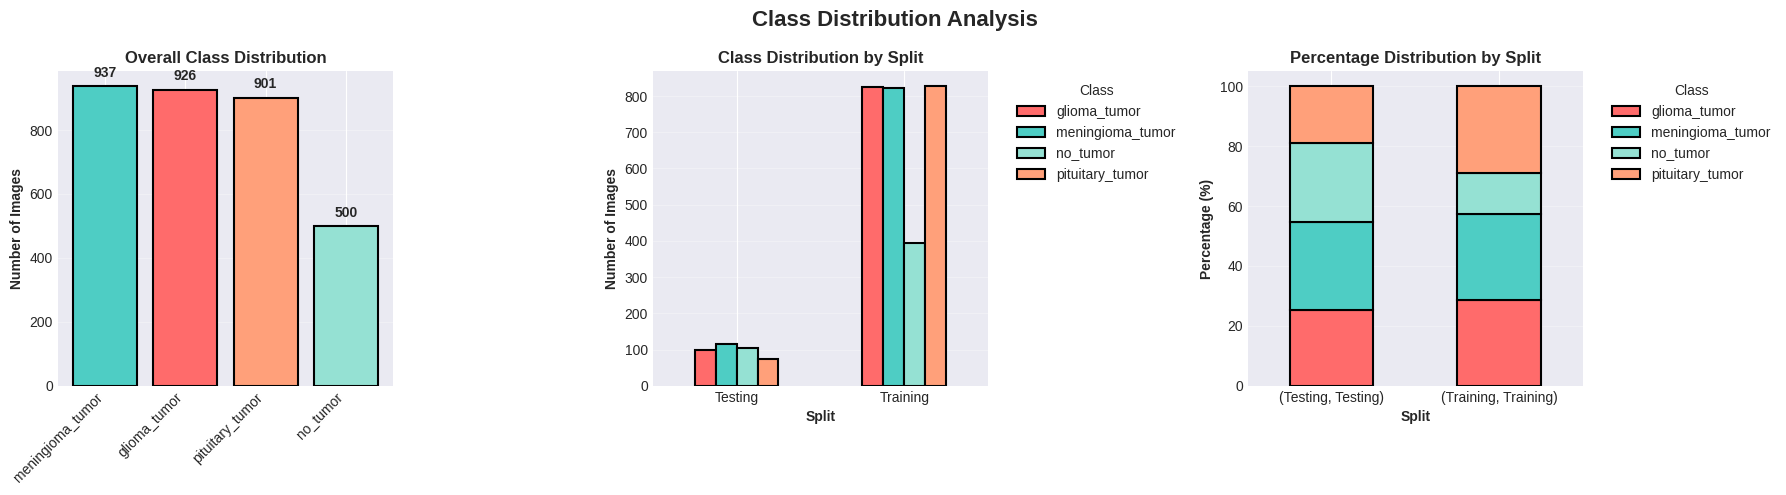

In [7]:
# Visualize class distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Class Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Overall distribution
class_counts = df['class'].value_counts()
colors = [CLASS_COLORS[cls] for cls in class_counts.index]
axes[0].bar(range(len(class_counts)), class_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_xticks(range(len(class_counts)))
axes[0].set_xticklabels(class_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Number of Images', fontweight='bold')
axes[0].set_title('Overall Class Distribution', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 20, str(v), ha='center', va='bottom', fontweight='bold')

# 2. Distribution by split
split_data = df.groupby(['split', 'class']).size().unstack(fill_value=0)
split_data.plot(kind='bar', ax=axes[1], color=[CLASS_COLORS[cls] for cls in split_data.columns],
                edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Split', fontweight='bold')
axes[1].set_ylabel('Number of Images', fontweight='bold')
axes[1].set_title('Class Distribution by Split', fontweight='bold')
axes[1].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].grid(axis='y', alpha=0.3)

# 3. Percentage distribution
split_pct = df.groupby(['split', 'class']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack()
split_pct.plot(kind='bar', stacked=True, ax=axes[2],
               color=[CLASS_COLORS[cls] for cls in split_pct.columns],
               edgecolor='black', linewidth=1.5)
axes[2].set_xlabel('Split', fontweight='bold')
axes[2].set_ylabel('Percentage (%)', fontweight='bold')
axes[2].set_title('Percentage Distribution by Split', fontweight='bold')
axes[2].legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Visualize Class Distribution - Pie Charts

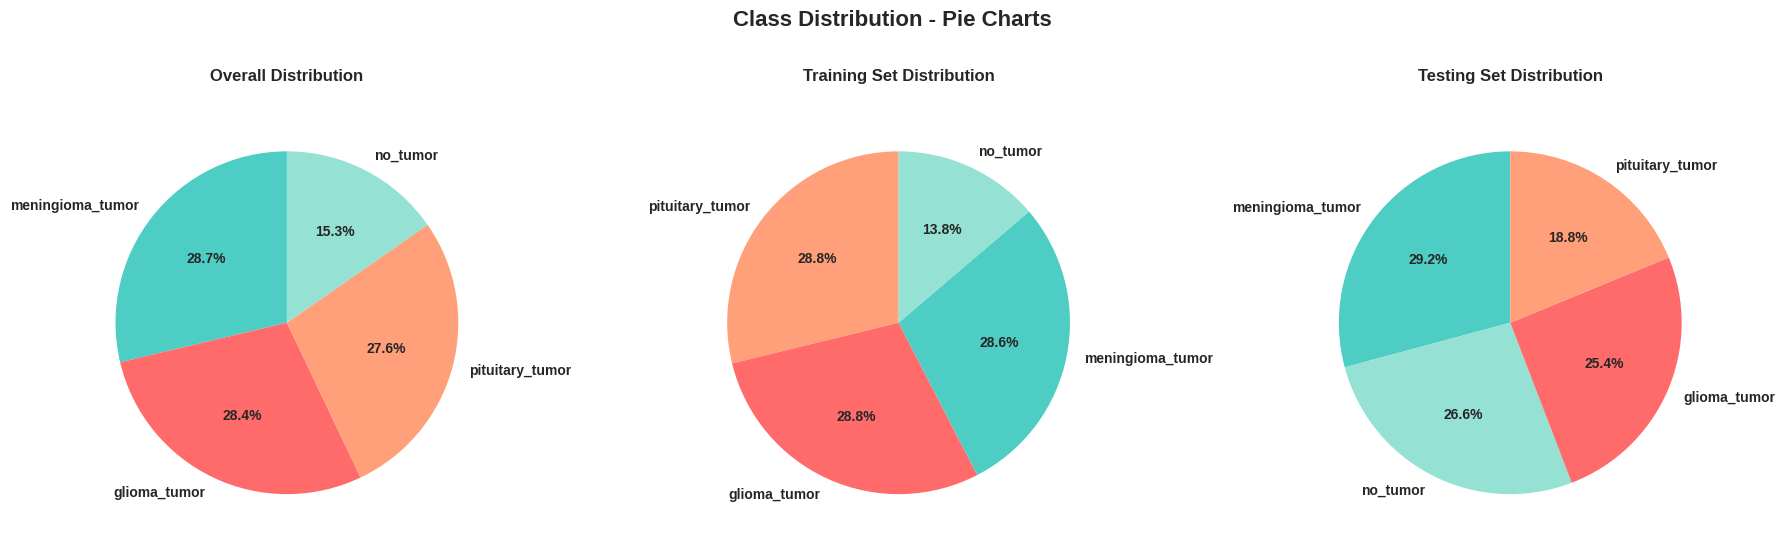

In [8]:
# Pie charts for class distribution
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Class Distribution - Pie Charts', fontsize=16, fontweight='bold')

# 1. Overall distribution
class_counts = df['class'].value_counts()
colors = [CLASS_COLORS[cls] for cls in class_counts.index]
axes[0].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontweight': 'bold'})
axes[0].set_title('Overall Distribution', fontweight='bold', pad=20)

# 2. Training split
train_counts = df[df['split'] == 'Training']['class'].value_counts()
colors = [CLASS_COLORS[cls] for cls in train_counts.index]
axes[1].pie(train_counts.values, labels=train_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontweight': 'bold'})
axes[1].set_title('Training Set Distribution', fontweight='bold', pad=20)

# 3. Testing split
test_counts = df[df['split'] == 'Testing']['class'].value_counts()
colors = [CLASS_COLORS[cls] for cls in test_counts.index]
axes[2].pie(test_counts.values, labels=test_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontweight': 'bold'})
axes[2].set_title('Testing Set Distribution', fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

 Image Dimension Analysis

In [9]:
# Image dimension analysis
print("\n" + "="*80)
print("IMAGE DIMENSION ANALYSIS")
print("="*80)

print("\n1. Unique Image Dimensions:")
print("-"*80)
dimensions = df.groupby(['width', 'height']).size().reset_index(name='count')
print(dimensions)

print("\n2. Dimension Statistics:")
print("-"*80)
print(f"Width  - Min: {df['width'].min()}, Max: {df['width'].max()}, Mean: {df['width'].mean():.2f}")
print(f"Height - Min: {df['height'].min()}, Max: {df['height'].max()}, Mean: {df['height'].mean():.2f}")

print("\n3. Aspect Ratios:")
print("-"*80)
df['aspect_ratio'] = df['width'] / df['height']
print(f"Min Aspect Ratio: {df['aspect_ratio'].min():.4f}")
print(f"Max Aspect Ratio: {df['aspect_ratio'].max():.4f}")
print(f"Mean Aspect Ratio: {df['aspect_ratio'].mean():.4f}")

# Check if all images have the same dimensions
if len(dimensions) == 1:
    print("\n✓ All images have consistent dimensions!")
    print(f"  Standard size: {dimensions.iloc[0]['width']}x{dimensions.iloc[0]['height']}")
else:
    print("\n✗ Images have varying dimensions!")


IMAGE DIMENSION ANALYSIS

1. Unique Image Dimensions:
--------------------------------------------------------------------------------
   width  height  count
0    224     224   3264

2. Dimension Statistics:
--------------------------------------------------------------------------------
Width  - Min: 224, Max: 224, Mean: 224.00
Height - Min: 224, Max: 224, Mean: 224.00

3. Aspect Ratios:
--------------------------------------------------------------------------------
Min Aspect Ratio: 1.0000
Max Aspect Ratio: 1.0000
Mean Aspect Ratio: 1.0000

✓ All images have consistent dimensions!
  Standard size: 224x224


File Size Analysis


FILE SIZE ANALYSIS

1. File Size Statistics (KB):
--------------------------------------------------------------------------------
Minimum:   6.40 KB
Maximum:   22.72 KB
Mean:      14.97 KB
Median:    15.10 KB
Std Dev:   2.72 KB

2. Total Dataset Size:
--------------------------------------------------------------------------------
Total: 47.71 MB (0.05 GB)

3. Average File Size by Class:
--------------------------------------------------------------------------------
pituitary_tumor          :  16.92 KB
no_tumor                 :  15.53 KB
meningioma_tumor         :  14.32 KB
glioma_tumor             :  13.42 KB


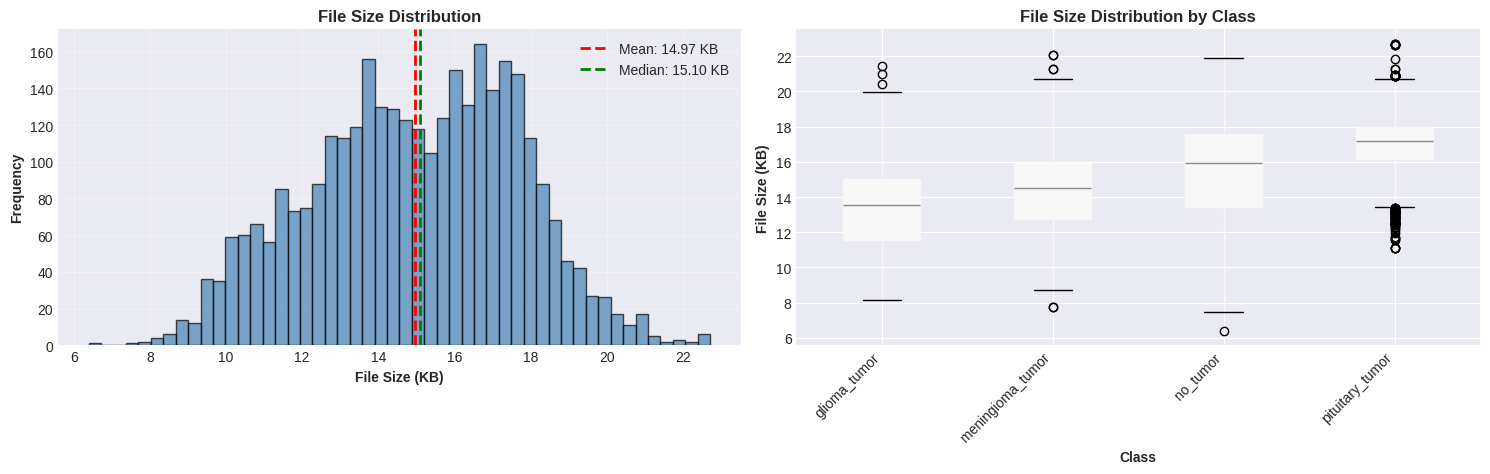

In [10]:
# File size analysis
print("\n" + "="*80)
print("FILE SIZE ANALYSIS")
print("="*80)

print("\n1. File Size Statistics (KB):")
print("-"*80)
print(f"Minimum:   {df['file_size_kb'].min():.2f} KB")
print(f"Maximum:   {df['file_size_kb'].max():.2f} KB")
print(f"Mean:      {df['file_size_kb'].mean():.2f} KB")
print(f"Median:    {df['file_size_kb'].median():.2f} KB")
print(f"Std Dev:   {df['file_size_kb'].std():.2f} KB")

print("\n2. Total Dataset Size:")
print("-"*80)
total_size_mb = df['file_size_kb'].sum() / 1024
print(f"Total: {total_size_mb:.2f} MB ({total_size_mb/1024:.2f} GB)")

print("\n3. Average File Size by Class:")
print("-"*80)
avg_size_by_class = df.groupby('class')['file_size_kb'].mean().sort_values(ascending=False)
for class_name, avg_size in avg_size_by_class.items():
    print(f"{class_name:25s}: {avg_size:6.2f} KB")

# Visualize file size distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('File Size Analysis', fontsize=16, fontweight='bold')

# 1. Histogram
axes[0].hist(df['file_size_kb'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['file_size_kb'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["file_size_kb"].mean():.2f} KB')
axes[0].axvline(df['file_size_kb'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["file_size_kb"].median():.2f} KB')
axes[0].set_xlabel('File Size (KB)', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('File Size Distribution', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 2. Box plot by class
df.boxplot(column='file_size_kb', by='class', ax=axes[1], patch_artist=True)
axes[1].set_xlabel('Class', fontweight='bold')
axes[1].set_ylabel('File Size (KB)', fontweight='bold')
axes[1].set_title('File Size Distribution by Class', fontweight='bold')
axes[1].get_figure().suptitle('')  # Remove default title
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Pixel Intensity Analysis


PIXEL INTENSITY ANALYSIS

1. Mean Intensity Statistics:
--------------------------------------------------------------------------------
Minimum:   18.28
Maximum:   137.67
Mean:      68.80
Median:    67.72
Std Dev:   17.86

2. Mean Intensity by Class:
--------------------------------------------------------------------------------
                       mean        std        min         max
class                                                        
glioma_tumor      57.544425  14.837259  30.887576  120.809809
meningioma_tumor  68.317313  18.658298  30.786392  137.667351
no_tumor          75.000903  18.788893  18.283582  130.336256
pituitary_tumor   77.436124  12.100251  46.066904  115.677156

3. Standard Deviation of Intensity by Class:
--------------------------------------------------------------------------------
no_tumor                 :  63.89
meningioma_tumor         :  61.36
pituitary_tumor          :  56.12
glioma_tumor             :  55.04


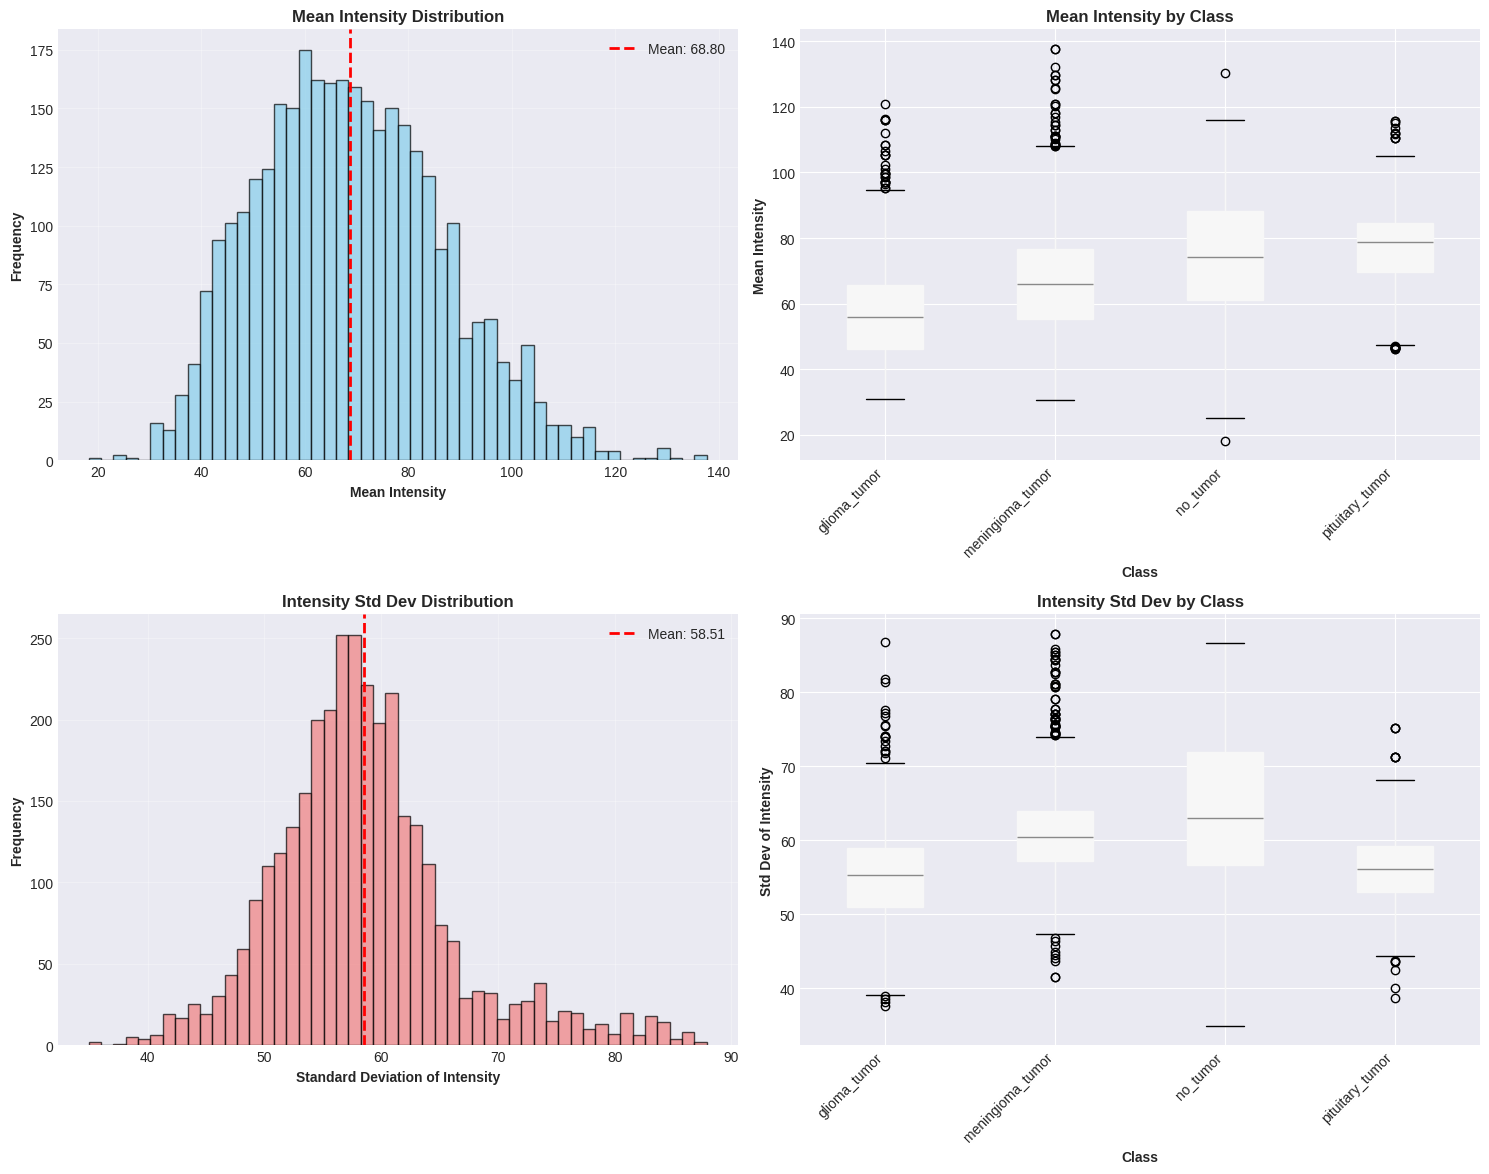

In [11]:
# Pixel intensity analysis
print("\n" + "="*80)
print("PIXEL INTENSITY ANALYSIS")
print("="*80)

print("\n1. Mean Intensity Statistics:")
print("-"*80)
print(f"Minimum:   {df['mean_intensity'].min():.2f}")
print(f"Maximum:   {df['mean_intensity'].max():.2f}")
print(f"Mean:      {df['mean_intensity'].mean():.2f}")
print(f"Median:    {df['mean_intensity'].median():.2f}")
print(f"Std Dev:   {df['mean_intensity'].std():.2f}")

print("\n2. Mean Intensity by Class:")
print("-"*80)
intensity_by_class = df.groupby('class')['mean_intensity'].agg(['mean', 'std', 'min', 'max'])
print(intensity_by_class)

print("\n3. Standard Deviation of Intensity by Class:")
print("-"*80)
std_by_class = df.groupby('class')['std_intensity'].mean().sort_values(ascending=False)
for class_name, std_val in std_by_class.items():
    print(f"{class_name:25s}: {std_val:6.2f}")

# Visualize intensity distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Pixel Intensity Analysis', fontsize=16, fontweight='bold')

# 1. Mean intensity histogram
axes[0, 0].hist(df['mean_intensity'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['mean_intensity'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {df["mean_intensity"].mean():.2f}')
axes[0, 0].set_xlabel('Mean Intensity', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].set_title('Mean Intensity Distribution', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Mean intensity by class
class_colors = [CLASS_COLORS[cls] for cls in df['class'].unique()]
df.boxplot(column='mean_intensity', by='class', ax=axes[0, 1], patch_artist=True)
axes[0, 1].set_xlabel('Class', fontweight='bold')
axes[0, 1].set_ylabel('Mean Intensity', fontweight='bold')
axes[0, 1].set_title('Mean Intensity by Class', fontweight='bold')
axes[0, 1].get_figure().suptitle('')
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# 3. Standard deviation distribution
axes[1, 0].hist(df['std_intensity'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(df['std_intensity'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {df["std_intensity"].mean():.2f}')
axes[1, 0].set_xlabel('Standard Deviation of Intensity', fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontweight='bold')
axes[1, 0].set_title('Intensity Std Dev Distribution', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Std intensity by class
df.boxplot(column='std_intensity', by='class', ax=axes[1, 1], patch_artist=True)
axes[1, 1].set_xlabel('Class', fontweight='bold')
axes[1, 1].set_ylabel('Std Dev of Intensity', fontweight='bold')
axes[1, 1].set_title('Intensity Std Dev by Class', fontweight='bold')
axes[1, 1].get_figure().suptitle('')
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Intensity Range Analysis

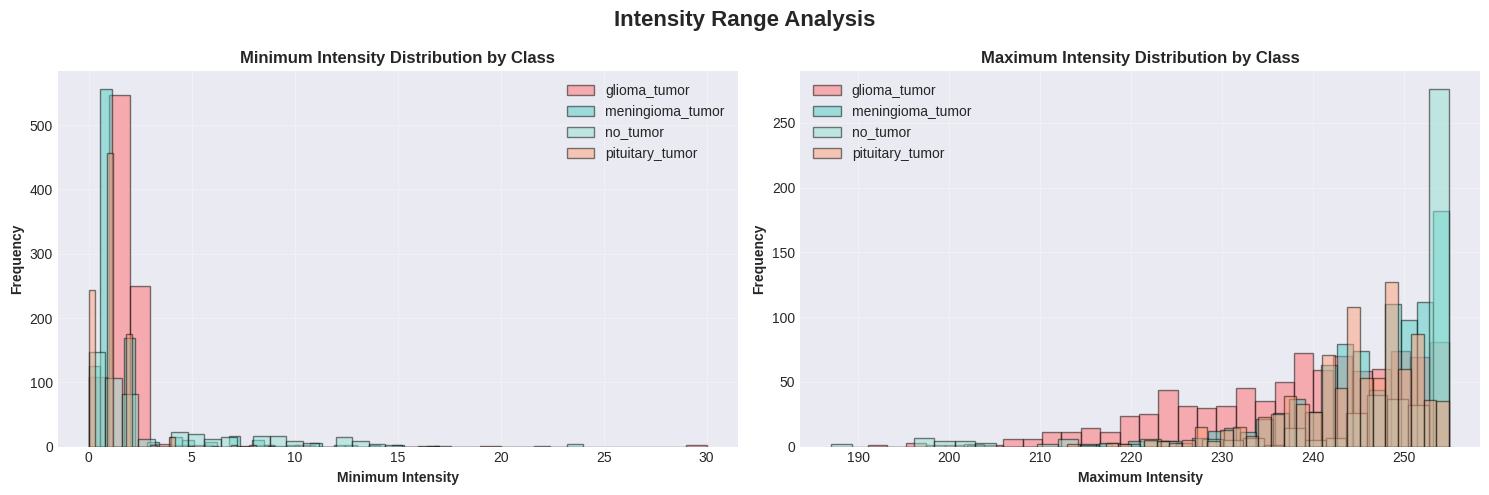

In [12]:
# Intensity range analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Intensity Range Analysis', fontsize=16, fontweight='bold')

# 1. Min intensity distribution
for class_name in TUMOR_CLASSES:
    class_data = df[df['class'] == class_name]['min_intensity']
    axes[0].hist(class_data, bins=30, alpha=0.5, label=class_name,
                 color=CLASS_COLORS[class_name], edgecolor='black')

axes[0].set_xlabel('Minimum Intensity', fontweight='bold')
axes[0].set_ylabel('Frequency', fontweight='bold')
axes[0].set_title('Minimum Intensity Distribution by Class', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 2. Max intensity distribution
for class_name in TUMOR_CLASSES:
    class_data = df[df['class'] == class_name]['max_intensity']
    axes[1].hist(class_data, bins=30, alpha=0.5, label=class_name,
                 color=CLASS_COLORS[class_name], edgecolor='black')

axes[1].set_xlabel('Maximum Intensity', fontweight='bold')
axes[1].set_ylabel('Frequency', fontweight='bold')
axes[1].set_title('Maximum Intensity Distribution by Class', fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Sample Images from Each Class

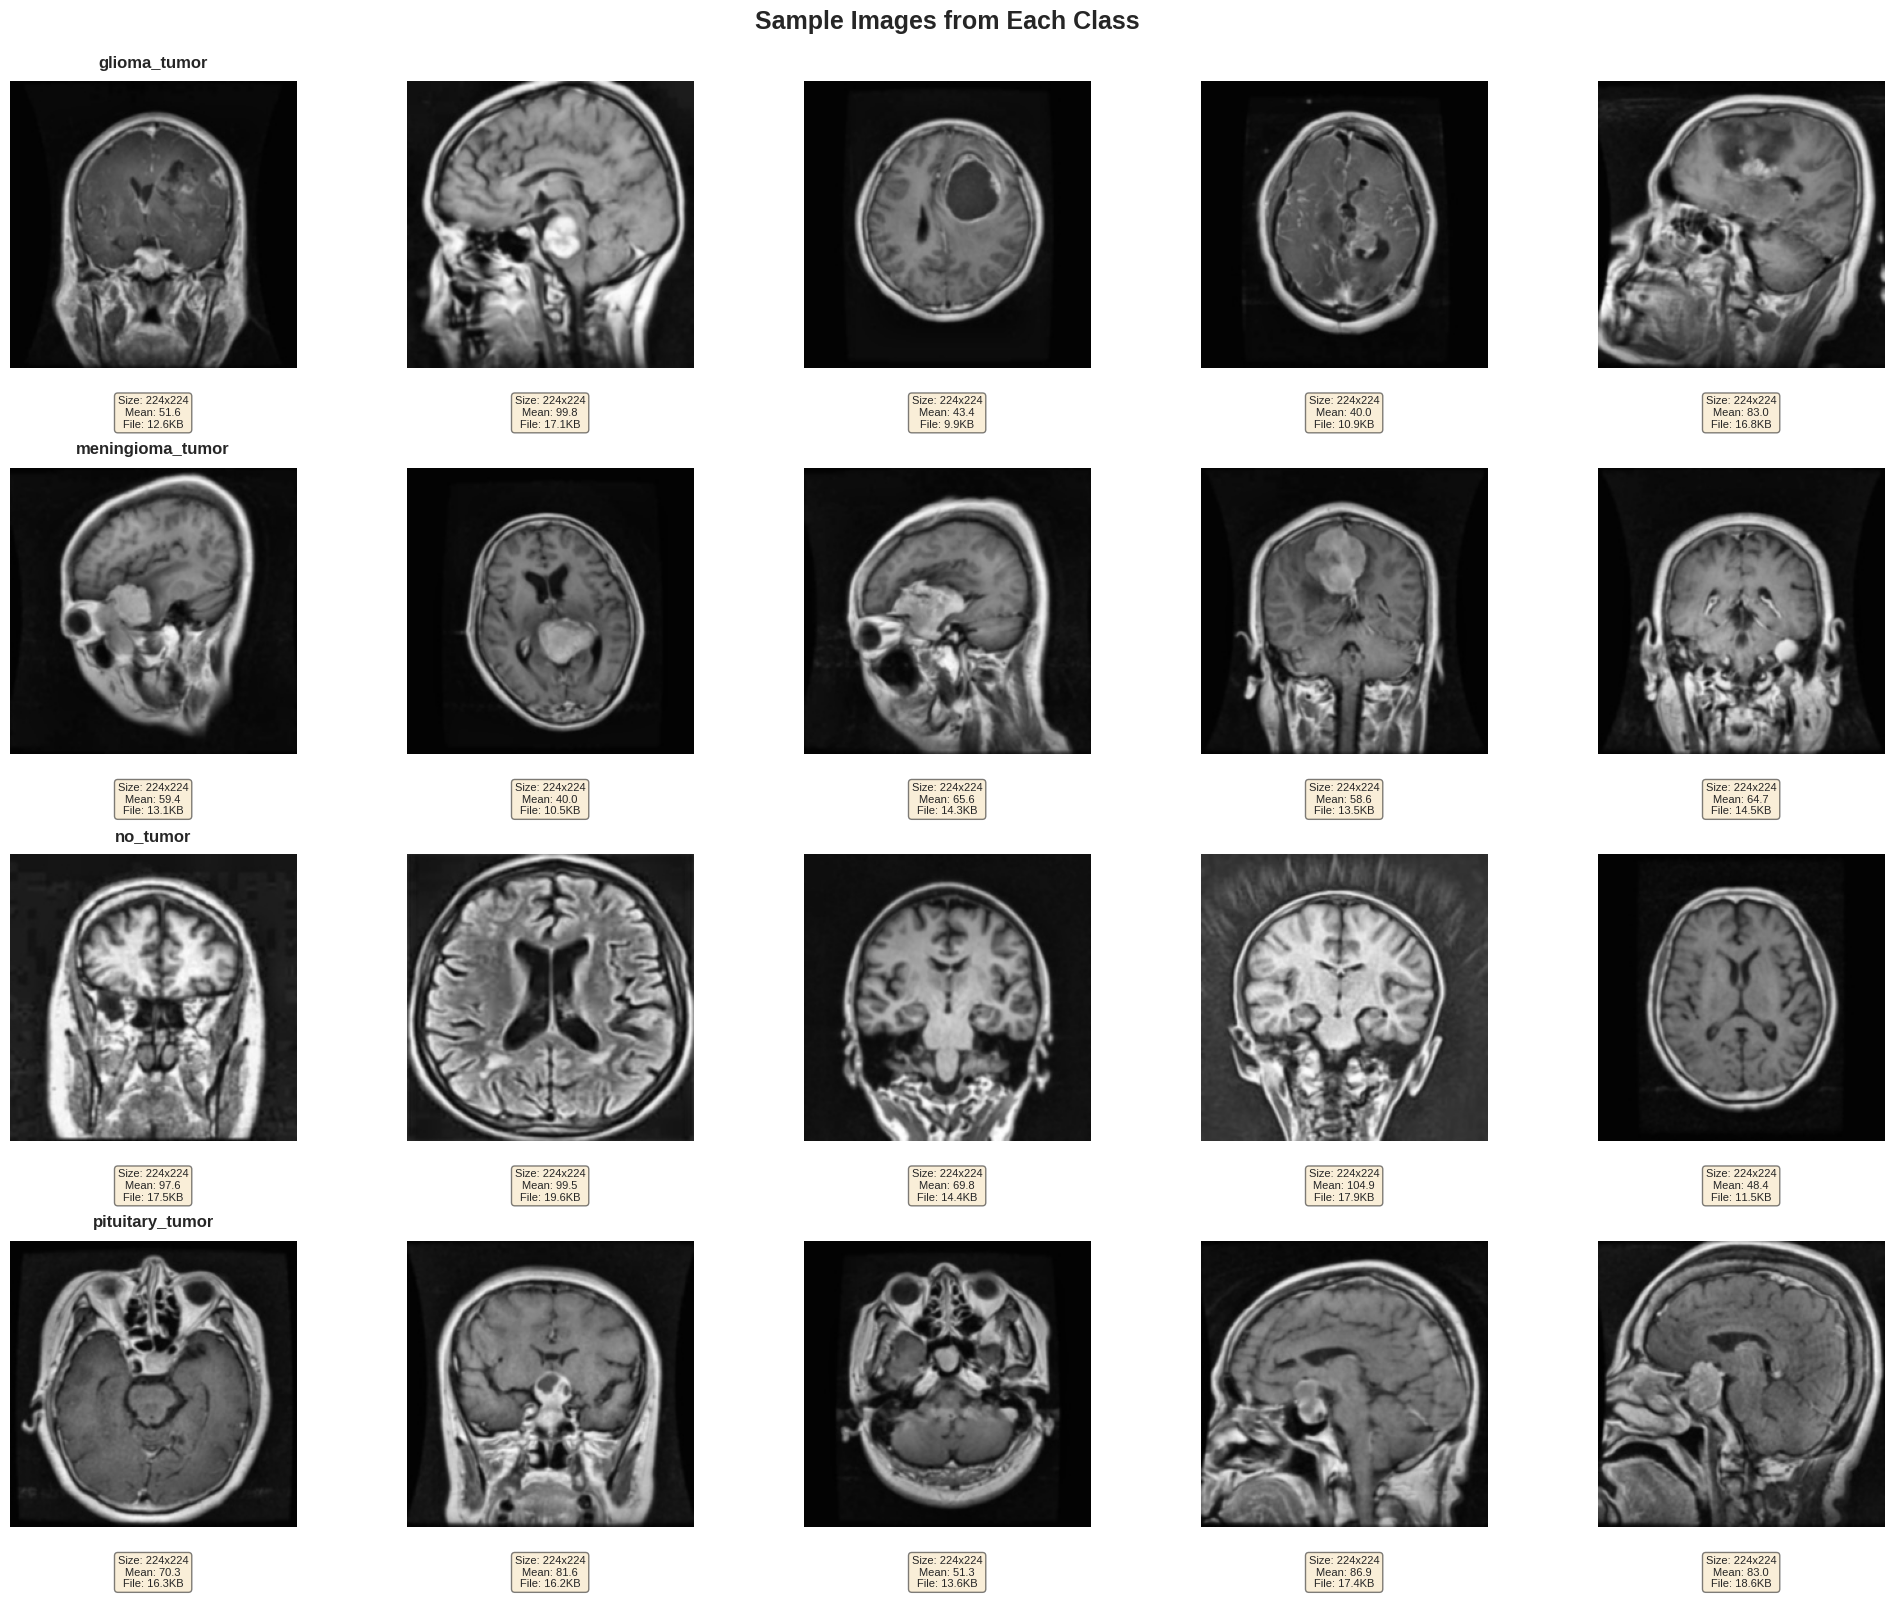

In [13]:
def display_sample_images(num_samples=5):
    """
    Display sample images from each class
    """
    fig, axes = plt.subplots(len(TUMOR_CLASSES), num_samples, figsize=(20, 16))
    fig.suptitle('Sample Images from Each Class', fontsize=18, fontweight='bold', y=0.995)

    for i, class_name in enumerate(TUMOR_CLASSES):
        class_df = df[df['class'] == class_name].sample(min(num_samples, len(df[df['class'] == class_name])))

        for j, (idx, row) in enumerate(class_df.iterrows()):
            img = cv2.imread(row['path'])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            axes[i, j].imshow(img)
            axes[i, j].axis('off')

            # Add information
            info_text = f"Size: {row['width']}x{row['height']}\n"
            info_text += f"Mean: {row['mean_intensity']:.1f}\n"
            info_text += f"File: {row['file_size_kb']:.1f}KB"

            axes[i, j].text(0.5, -0.1, info_text, transform=axes[i, j].transAxes,
                           ha='center', va='top', fontsize=8,
                           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

            if j == 0:
                axes[i, j].set_title(f"{class_name}", fontsize=12, fontweight='bold', pad=10)

    plt.tight_layout()
    plt.show()

# Display sample images
display_sample_images(num_samples=5)

Average Image per Class

Computing average for glioma_tumor using 100 images...


  glioma_tumor: 100%|██████████| 100/100 [00:02<00:00, 44.09it/s]


Computing average for meningioma_tumor using 100 images...


  meningioma_tumor: 100%|██████████| 100/100 [00:00<00:00, 113.97it/s]


Computing average for no_tumor using 100 images...


  no_tumor: 100%|██████████| 100/100 [00:00<00:00, 107.87it/s]


Computing average for pituitary_tumor using 100 images...


  pituitary_tumor: 100%|██████████| 100/100 [00:00<00:00, 122.70it/s]


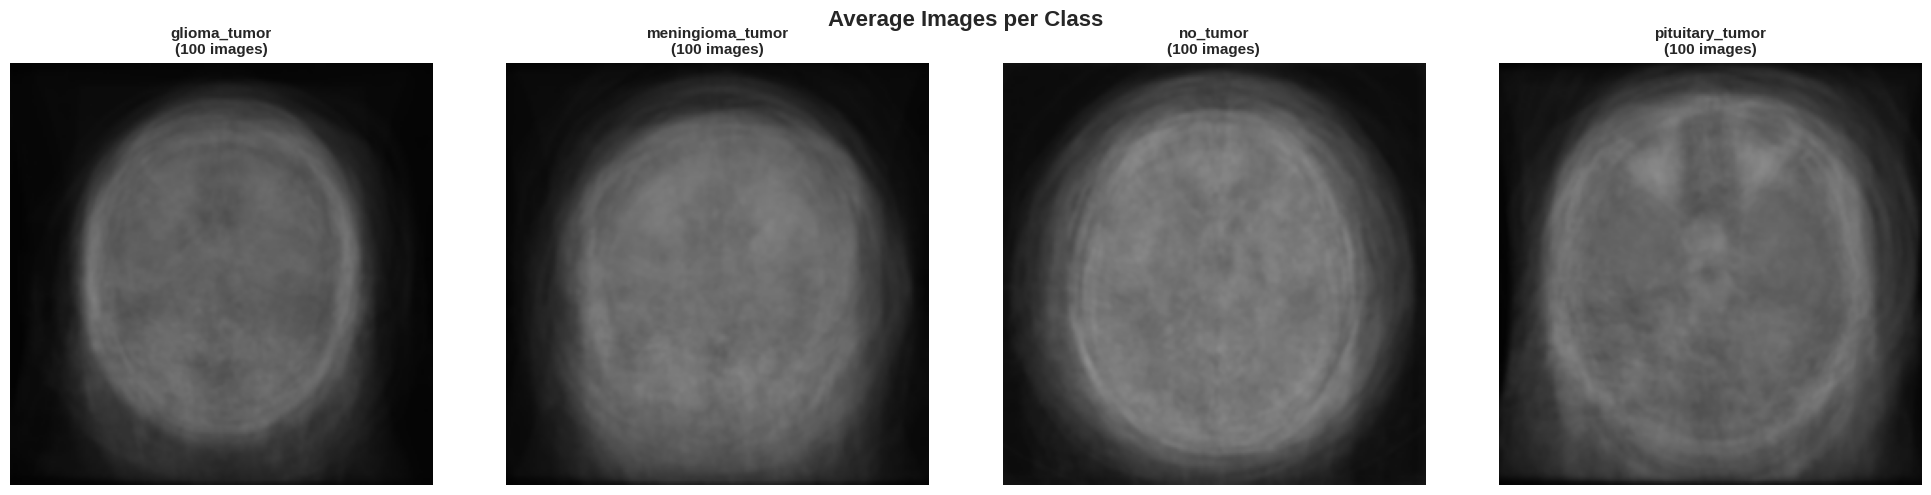


✓ Average images computed successfully!


In [14]:
def compute_average_images():
    """
    Compute and display average image for each class
    """
    fig, axes = plt.subplots(1, len(TUMOR_CLASSES), figsize=(20, 5))
    fig.suptitle('Average Images per Class', fontsize=16, fontweight='bold')

    for i, class_name in enumerate(TUMOR_CLASSES):
        class_df = df[df['class'] == class_name]

        # Initialize accumulator
        avg_img = None
        count = 0

        # Sample maximum 100 images for efficiency
        sample_df = class_df.sample(min(100, len(class_df)))

        print(f"Computing average for {class_name} using {len(sample_df)} images...")

        for idx, row in tqdm(sample_df.iterrows(), total=len(sample_df), desc=f"  {class_name}"):
            img = cv2.imread(row['path'])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = img.astype(np.float32)

            if avg_img is None:
                avg_img = img
            else:
                avg_img += img
            count += 1

        # Calculate average
        avg_img = (avg_img / count).astype(np.uint8)

        # Display
        axes[i].imshow(avg_img)
        axes[i].axis('off')
        axes[i].set_title(f'{class_name}\n({count} images)', fontweight='bold', fontsize=11)

    plt.tight_layout()
    plt.show()

    print("\n✓ Average images computed successfully!")

# Compute average images
compute_average_images()

Color Channel Analysis

Analyzing color channels...


  pituitary_tumor: 100%|██████████| 50/50 [00:00<00:00, 125.16it/s]


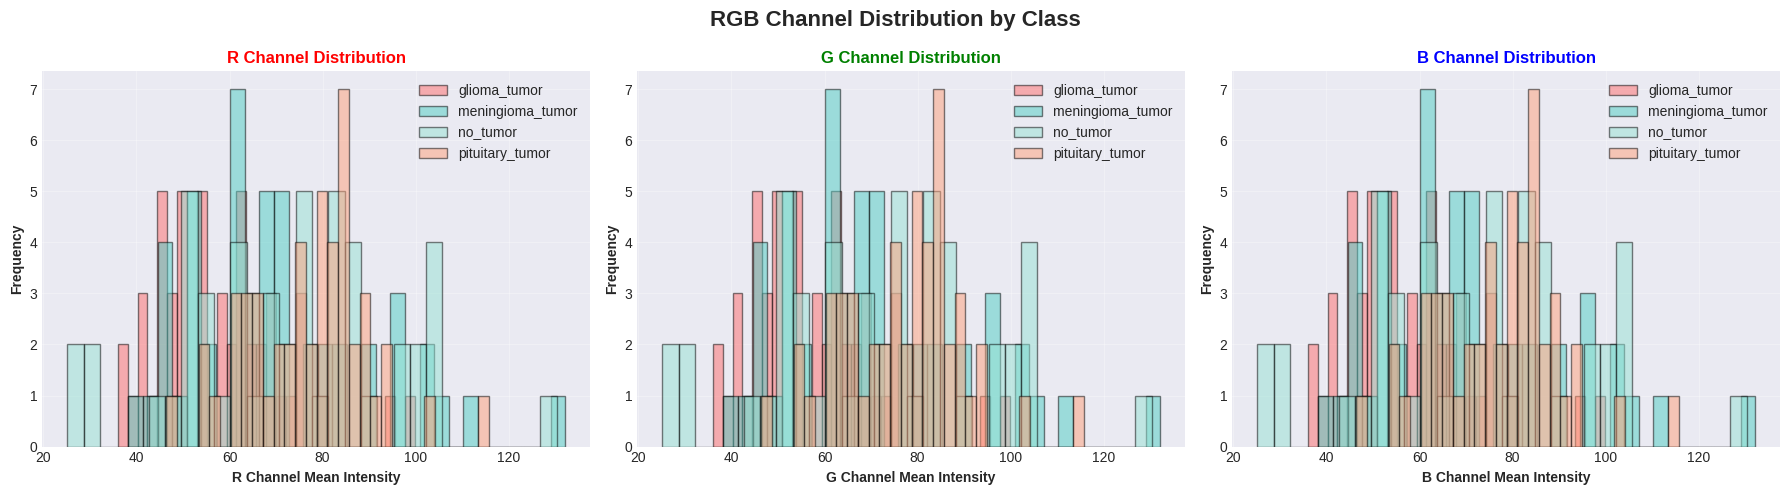


COLOR CHANNEL STATISTICS

glioma_tumor:
--------------------------------------------------------------------------------
  R Channel - Mean: 57.80, Std: 13.71
  G Channel - Mean: 57.80, Std: 13.71
  B Channel - Mean: 57.80, Std: 13.71

meningioma_tumor:
--------------------------------------------------------------------------------
  R Channel - Mean: 70.52, Std: 19.90
  G Channel - Mean: 70.52, Std: 19.90
  B Channel - Mean: 70.52, Std: 19.90

no_tumor:
--------------------------------------------------------------------------------
  R Channel - Mean: 72.18, Std: 22.28
  G Channel - Mean: 72.18, Std: 22.28
  B Channel - Mean: 72.18, Std: 22.28

pituitary_tumor:
--------------------------------------------------------------------------------
  R Channel - Mean: 77.24, Std: 12.89
  G Channel - Mean: 77.24, Std: 12.89
  B Channel - Mean: 77.24, Std: 12.89


In [15]:
def analyze_color_channels(num_samples=50):
    """
    Analyze RGB color channel distributions for each class
    """
    print("Analyzing color channels...")

    channel_data = {class_name: {'R': [], 'G': [], 'B': []} for class_name in TUMOR_CLASSES}

    for class_name in TUMOR_CLASSES:
        class_df = df[df['class'] == class_name].sample(min(num_samples, len(df[df['class'] == class_name])))

        for idx, row in tqdm(class_df.iterrows(), total=len(class_df), desc=f"  {class_name}"):
            img = cv2.imread(row['path'])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Calculate mean for each channel
            channel_data[class_name]['R'].append(np.mean(img[:, :, 0]))
            channel_data[class_name]['G'].append(np.mean(img[:, :, 1]))
            channel_data[class_name]['B'].append(np.mean(img[:, :, 2]))

    # Visualize
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('RGB Channel Distribution by Class', fontsize=16, fontweight='bold')

    channels = ['R', 'G', 'B']
    channel_colors = ['red', 'green', 'blue']

    for i, (channel, color) in enumerate(zip(channels, channel_colors)):
        for class_name in TUMOR_CLASSES:
            axes[i].hist(channel_data[class_name][channel], bins=30, alpha=0.5,
                        label=class_name, color=CLASS_COLORS[class_name], edgecolor='black')

        axes[i].set_xlabel(f'{channel} Channel Mean Intensity', fontweight='bold')
        axes[i].set_ylabel('Frequency', fontweight='bold')
        axes[i].set_title(f'{channel} Channel Distribution', fontweight='bold', color=color)
        axes[i].legend()
        axes[i].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print statistics
    print("\n" + "="*80)
    print("COLOR CHANNEL STATISTICS")
    print("="*80)

    for class_name in TUMOR_CLASSES:
        print(f"\n{class_name}:")
        print("-"*80)
        for channel in channels:
            mean_val = np.mean(channel_data[class_name][channel])
            std_val = np.std(channel_data[class_name][channel])
            print(f"  {channel} Channel - Mean: {mean_val:.2f}, Std: {std_val:.2f}")

analyze_color_channels(num_samples=50)

Brightness Distribution Analysis

Analyzing brightness distribution...


  pituitary_tumor: 100%|██████████| 100/100 [00:00<00:00, 118.99it/s]


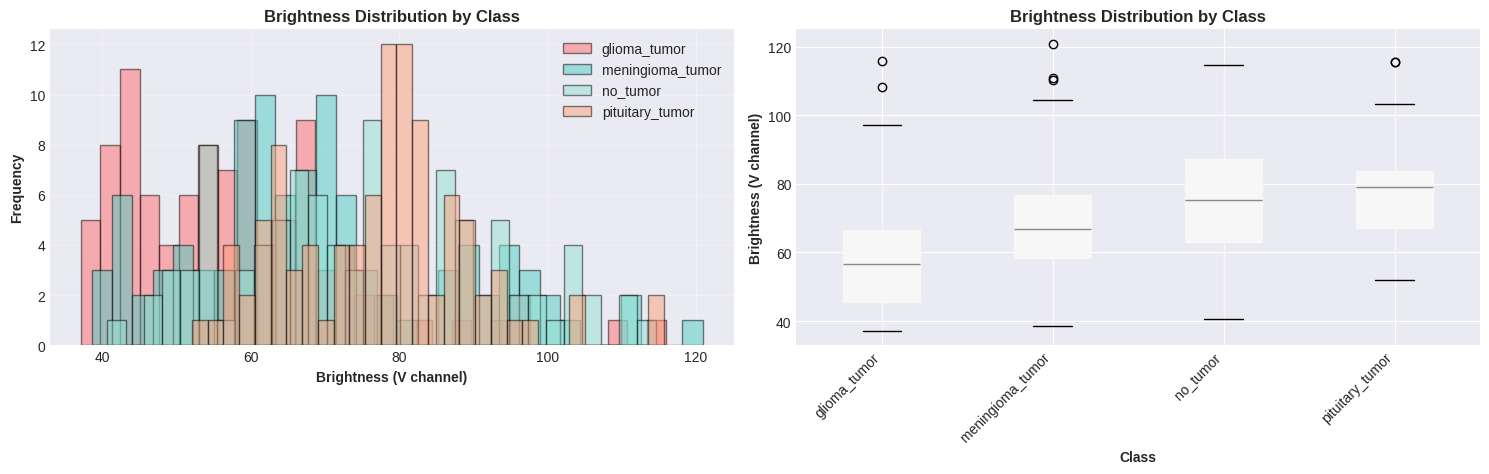


BRIGHTNESS STATISTICS
glioma_tumor             : Mean = 58.14, Std = 15.37
meningioma_tumor         : Mean = 68.82, Std = 17.86
no_tumor                 : Mean = 75.32, Std = 17.00
pituitary_tumor          : Mean = 77.40, Std = 12.27


In [16]:
# Brightness distribution analysis
def analyze_brightness():
    """
    Analyze brightness distribution across classes
    """
    print("Analyzing brightness distribution...")

    # Calculate brightness for sample images
    brightness_data = {class_name: [] for class_name in TUMOR_CLASSES}

    for class_name in TUMOR_CLASSES:
        class_df = df[df['class'] == class_name].sample(min(100, len(df[df['class'] == class_name])))

        for idx, row in tqdm(class_df.iterrows(), total=len(class_df), desc=f"  {class_name}"):
            img = cv2.imread(row['path'])

            # Convert to HSV and extract V (brightness) channel
            hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            brightness = np.mean(hsv[:, :, 2])
            brightness_data[class_name].append(brightness)

    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle('Brightness Analysis', fontsize=16, fontweight='bold')

    # 1. Histogram
    for class_name in TUMOR_CLASSES:
        axes[0].hist(brightness_data[class_name], bins=30, alpha=0.5,
                    label=class_name, color=CLASS_COLORS[class_name], edgecolor='black')

    axes[0].set_xlabel('Brightness (V channel)', fontweight='bold')
    axes[0].set_ylabel('Frequency', fontweight='bold')
    axes[0].set_title('Brightness Distribution by Class', fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # 2. Box plot
    brightness_df = pd.DataFrame([
        {'Class': class_name, 'Brightness': brightness}
        for class_name in TUMOR_CLASSES
        for brightness in brightness_data[class_name]
    ])

    brightness_df.boxplot(column='Brightness', by='Class', ax=axes[1], patch_artist=True)
    axes[1].set_xlabel('Class', fontweight='bold')
    axes[1].set_ylabel('Brightness (V channel)', fontweight='bold')
    axes[1].set_title('Brightness Distribution by Class', fontweight='bold')
    axes[1].get_figure().suptitle('')
    plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    # Print statistics
    print("\n" + "="*80)
    print("BRIGHTNESS STATISTICS")
    print("="*80)

    for class_name in TUMOR_CLASSES:
        mean_brightness = np.mean(brightness_data[class_name])
        std_brightness = np.std(brightness_data[class_name])
        print(f"{class_name:25s}: Mean = {mean_brightness:.2f}, Std = {std_brightness:.2f}")

analyze_brightness()

Image Contrast Analysis

Analyzing image contrast...


  pituitary_tumor: 100%|██████████| 100/100 [00:00<00:00, 123.56it/s]


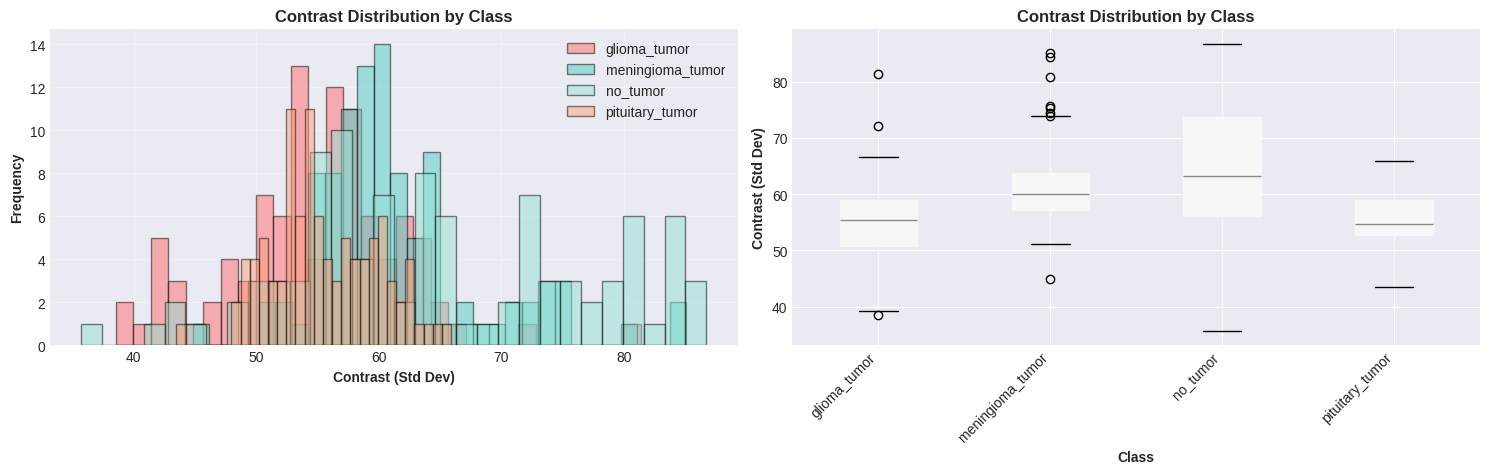


CONTRAST STATISTICS

glioma_tumor:
  Mean: 54.73, Std: 7.05
  Min: 38.53, Max: 81.39

meningioma_tumor:
  Mean: 61.46, Std: 6.86
  Min: 44.84, Max: 85.09

no_tumor:
  Mean: 64.80, Std: 11.77
  Min: 35.72, Max: 86.72

pituitary_tumor:
  Mean: 55.50, Std: 4.32
  Min: 43.49, Max: 65.90


In [17]:
def analyze_contrast(num_samples=100):
    """
    Analyze contrast levels across different classes
    """
    print("Analyzing image contrast...")
    print("="*60)

    contrast_data = {class_name: [] for class_name in TUMOR_CLASSES}

    for class_name in TUMOR_CLASSES:
        class_df = df[df['class'] == class_name].sample(min(num_samples, len(df[df['class'] == class_name])))

        for idx, row in tqdm(class_df.iterrows(), total=len(class_df), desc=f"  {class_name}"):
            img = cv2.imread(row['path'], cv2.IMREAD_GRAYSCALE)

            # Calculate contrast using standard deviation
            contrast = np.std(img)
            contrast_data[class_name].append(contrast)

    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle('Contrast Analysis', fontsize=16, fontweight='bold')

    # 1. Histogram
    for class_name in TUMOR_CLASSES:
        axes[0].hist(contrast_data[class_name], bins=30, alpha=0.5,
                    label=class_name, color=CLASS_COLORS[class_name], edgecolor='black')

    axes[0].set_xlabel('Contrast (Std Dev)', fontweight='bold')
    axes[0].set_ylabel('Frequency', fontweight='bold')
    axes[0].set_title('Contrast Distribution by Class', fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # 2. Box plot
    contrast_df = pd.DataFrame([
        {'Class': class_name, 'Contrast': contrast}
        for class_name in TUMOR_CLASSES
        for contrast in contrast_data[class_name]
    ])

    contrast_df.boxplot(column='Contrast', by='Class', ax=axes[1], patch_artist=True)
    axes[1].set_xlabel('Class', fontweight='bold')
    axes[1].set_ylabel('Contrast (Std Dev)', fontweight='bold')
    axes[1].set_title('Contrast Distribution by Class', fontweight='bold')
    axes[1].get_figure().suptitle('')
    plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    # Print statistics
    print("\n" + "="*80)
    print("CONTRAST STATISTICS")
    print("="*80)

    for class_name in TUMOR_CLASSES:
        mean_contrast = np.mean(contrast_data[class_name])
        std_contrast = np.std(contrast_data[class_name])
        min_contrast = np.min(contrast_data[class_name])
        max_contrast = np.max(contrast_data[class_name])
        print(f"\n{class_name}:")
        print(f"  Mean: {mean_contrast:.2f}, Std: {std_contrast:.2f}")
        print(f"  Min: {min_contrast:.2f}, Max: {max_contrast:.2f}")

# Run contrast analysis
analyze_contrast(num_samples=100)

Edge Detection Analysis

Analyzing edge characteristics...


  pituitary_tumor: 100%|██████████| 20/20 [00:00<00:00, 61.19it/s]


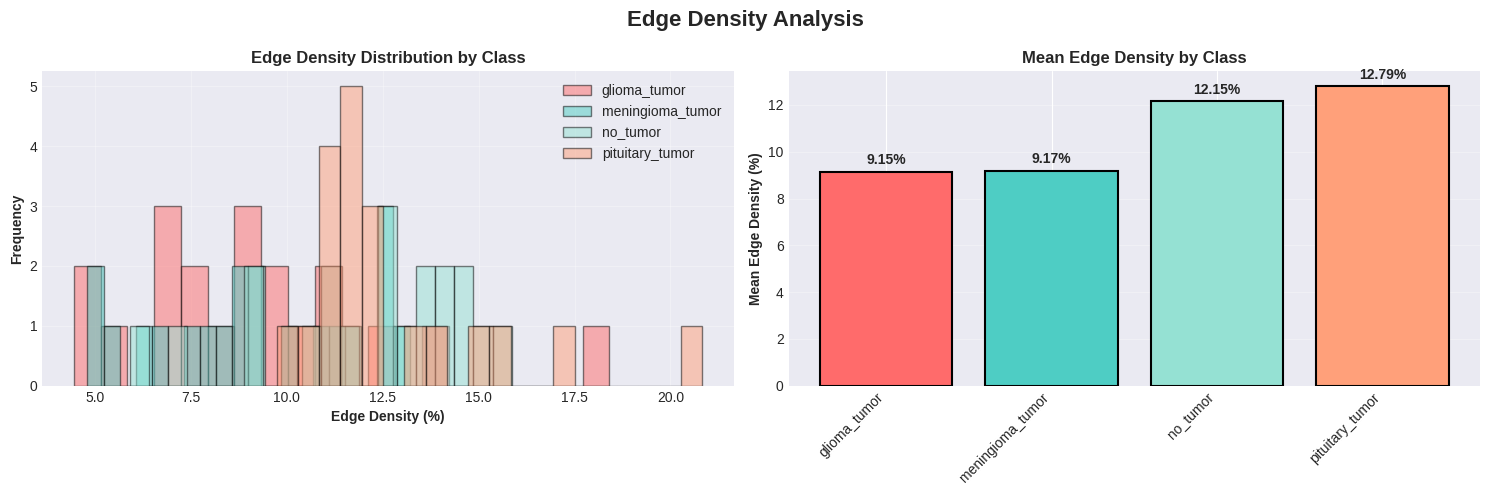


EDGE DENSITY STATISTICS
glioma_tumor             : Mean = 9.15%, Std = 3.20%
meningioma_tumor         : Mean = 9.17%, Std = 2.62%
no_tumor                 : Mean = 12.15%, Std = 2.68%
pituitary_tumor          : Mean = 12.79%, Std = 2.55%


In [18]:
def analyze_edges(num_samples=20):
    """
    Analyze edge characteristics for each class
    """
    print("Analyzing edge characteristics...")
    print("="*60)

    edge_density_data = {class_name: [] for class_name in TUMOR_CLASSES}

    for class_name in TUMOR_CLASSES:
        class_df = df[df['class'] == class_name].sample(min(num_samples, len(df[df['class'] == class_name])))

        for idx, row in tqdm(class_df.iterrows(), total=len(class_df), desc=f"  {class_name}"):
            img = cv2.imread(row['path'], cv2.IMREAD_GRAYSCALE)

            # Apply Canny edge detection
            edges = cv2.Canny(img, 100, 200)

            # Calculate edge density (percentage of edge pixels)
            edge_density = (np.sum(edges > 0) / edges.size) * 100
            edge_density_data[class_name].append(edge_density)

    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle('Edge Density Analysis', fontsize=16, fontweight='bold')

    # 1. Histogram
    for class_name in TUMOR_CLASSES:
        axes[0].hist(edge_density_data[class_name], bins=20, alpha=0.5,
                    label=class_name, color=CLASS_COLORS[class_name], edgecolor='black')

    axes[0].set_xlabel('Edge Density (%)', fontweight='bold')
    axes[0].set_ylabel('Frequency', fontweight='bold')
    axes[0].set_title('Edge Density Distribution by Class', fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # 2. Bar plot of mean edge density
    mean_edge_density = {class_name: np.mean(edge_density_data[class_name])
                         for class_name in TUMOR_CLASSES}

    colors = [CLASS_COLORS[cls] for cls in mean_edge_density.keys()]
    axes[1].bar(range(len(mean_edge_density)), list(mean_edge_density.values()),
               color=colors, edgecolor='black', linewidth=1.5)
    axes[1].set_xticks(range(len(mean_edge_density)))
    axes[1].set_xticklabels(list(mean_edge_density.keys()), rotation=45, ha='right')
    axes[1].set_ylabel('Mean Edge Density (%)', fontweight='bold')
    axes[1].set_title('Mean Edge Density by Class', fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)

    # Add value labels
    for i, v in enumerate(mean_edge_density.values()):
        axes[1].text(i, v + 0.2, f'{v:.2f}%', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Print statistics
    print("\n" + "="*80)
    print("EDGE DENSITY STATISTICS")
    print("="*80)

    for class_name in TUMOR_CLASSES:
        mean_density = np.mean(edge_density_data[class_name])
        std_density = np.std(edge_density_data[class_name])
        print(f"{class_name:25s}: Mean = {mean_density:.2f}%, Std = {std_density:.2f}%")

# Run edge analysis
analyze_edges(num_samples=20)

Sample Edge Detection Visualization

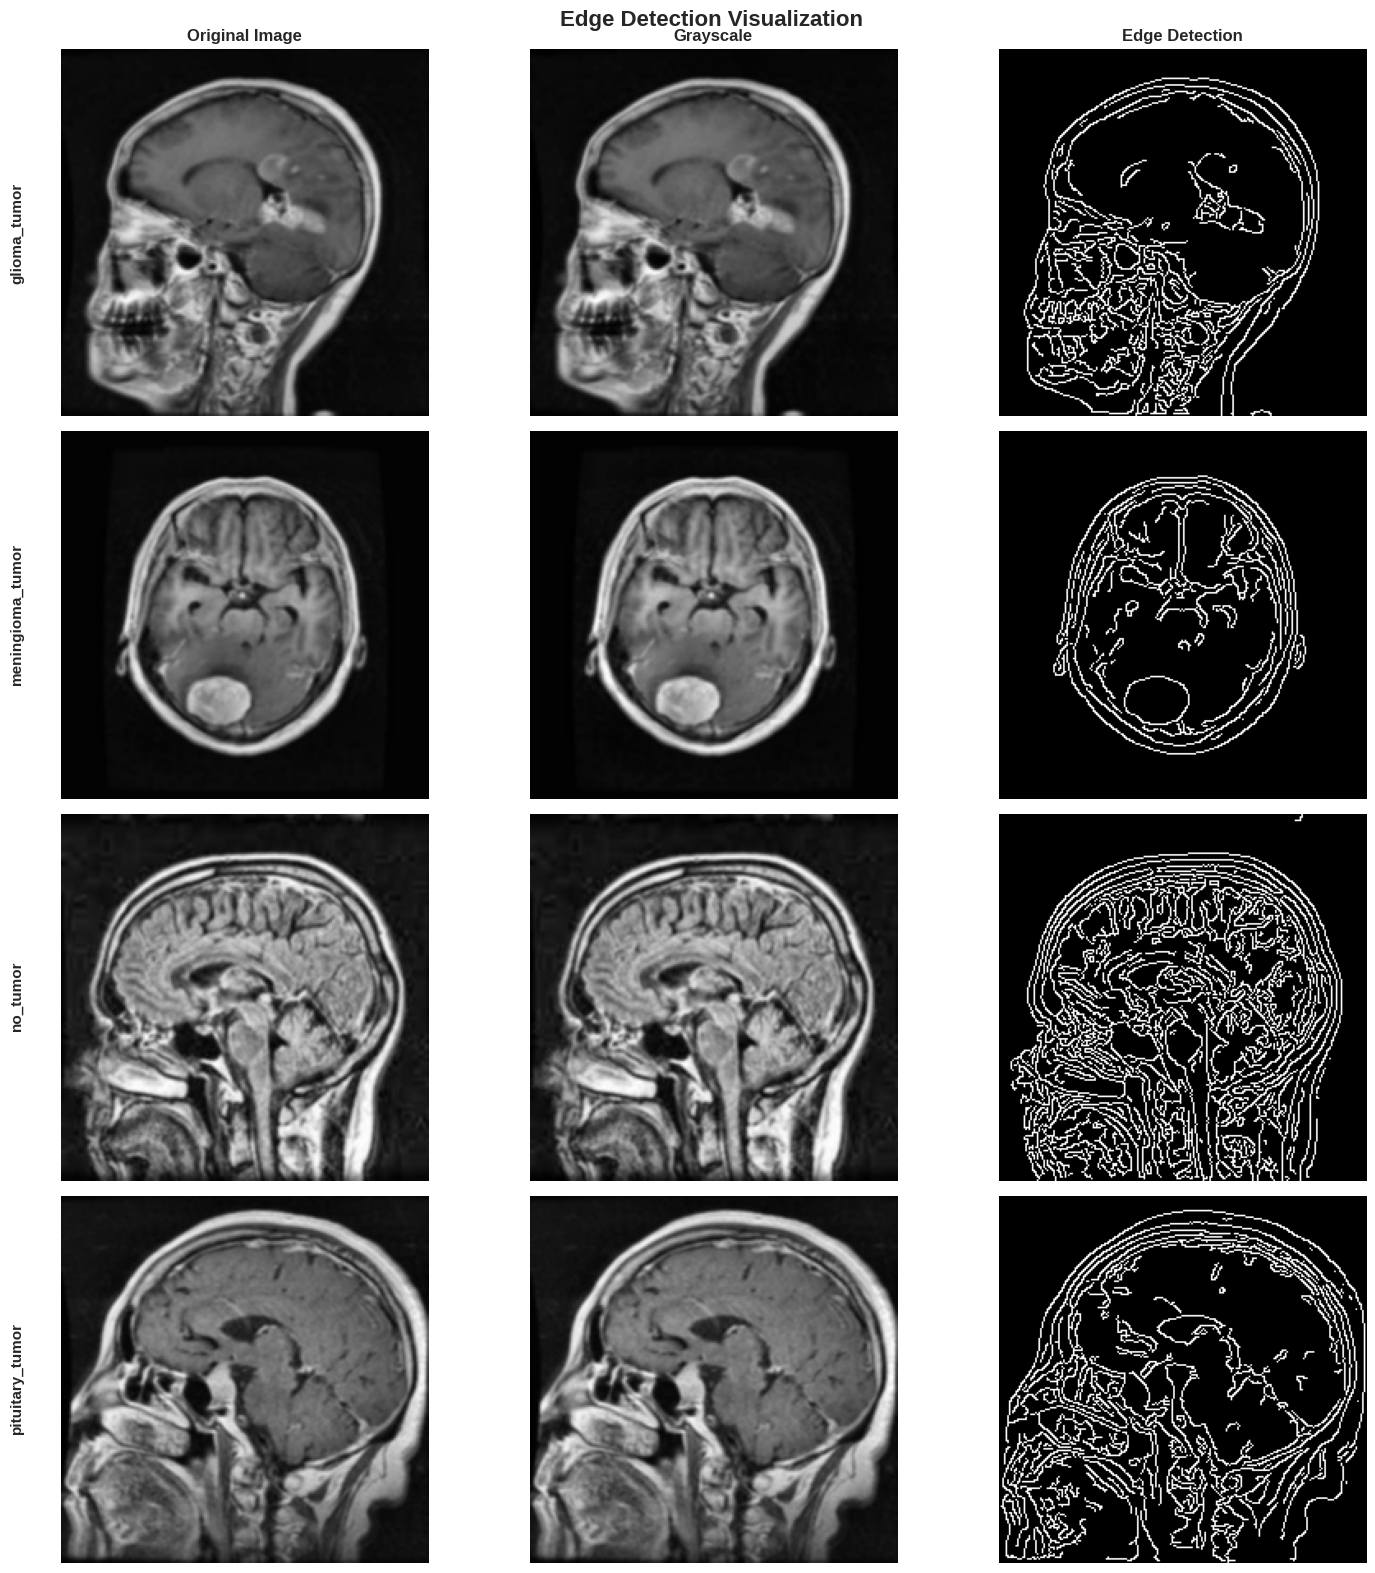

In [19]:
def visualize_edge_detection():
    """
    Visualize edge detection on sample images from each class
    """
    fig, axes = plt.subplots(len(TUMOR_CLASSES), 3, figsize=(15, 16))
    fig.suptitle('Edge Detection Visualization', fontsize=16, fontweight='bold')

    for i, class_name in enumerate(TUMOR_CLASSES):
        class_df = df[df['class'] == class_name].sample(1)

        for idx, row in class_df.iterrows():
            # Read original image
            img = cv2.imread(row['path'])
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Apply Canny edge detection
            edges = cv2.Canny(img_gray, 100, 200)

            # Display original
            axes[i, 0].imshow(img_rgb)
            axes[i, 0].axis('off')
            if i == 0:
                axes[i, 0].set_title('Original Image', fontweight='bold', fontsize=12)
            axes[i, 0].text(-0.1, 0.5, class_name, transform=axes[i, 0].transAxes,
                           rotation=90, va='center', ha='right', fontweight='bold', fontsize=11)

            # Display grayscale
            axes[i, 1].imshow(img_gray, cmap='gray')
            axes[i, 1].axis('off')
            if i == 0:
                axes[i, 1].set_title('Grayscale', fontweight='bold', fontsize=12)

            # Display edges
            axes[i, 2].imshow(edges, cmap='gray')
            axes[i, 2].axis('off')
            if i == 0:
                axes[i, 2].set_title('Edge Detection', fontweight='bold', fontsize=12)

    plt.tight_layout()
    plt.show()

# Visualize edge detection
visualize_edge_detection()

Correlation Analysis


CORRELATION ANALYSIS

Correlation Matrix:
--------------------------------------------------------------------------------
                width  height  file_size_kb  mean_intensity  std_intensity  \
width             NaN     NaN           NaN             NaN            NaN   
height            NaN     NaN           NaN             NaN            NaN   
file_size_kb      NaN     NaN         1.000           0.882          0.181   
mean_intensity    NaN     NaN         0.882           1.000          0.400   
std_intensity     NaN     NaN         0.181           0.400          1.000   
min_intensity     NaN     NaN         0.100           0.238         -0.061   
max_intensity     NaN     NaN         0.422           0.535          0.611   

                min_intensity  max_intensity  
width                     NaN            NaN  
height                    NaN            NaN  
file_size_kb            0.100          0.422  
mean_intensity          0.238          0.535  
std_intensity   

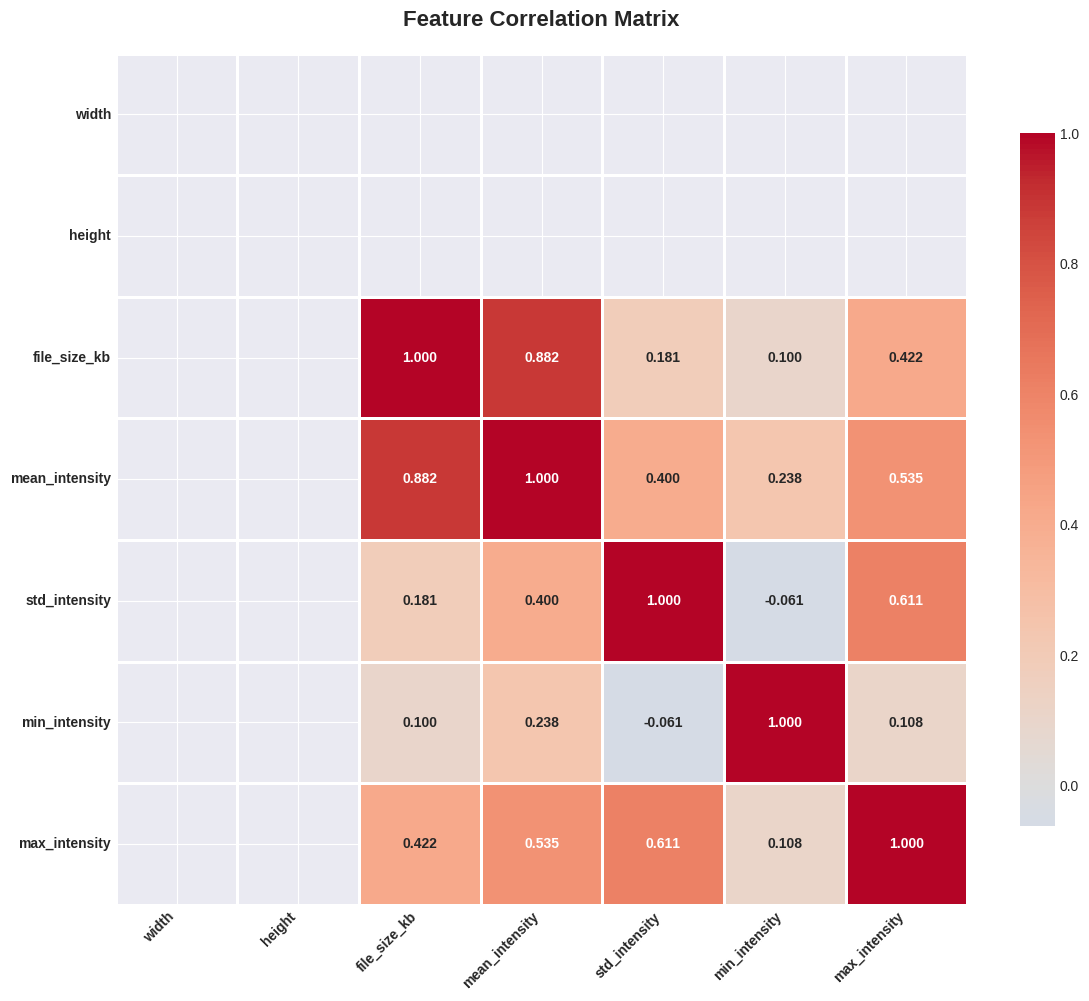


STRONG CORRELATIONS (|correlation| > 0.7)
   Feature 1      Feature 2  Correlation
file_size_kb mean_intensity        0.882


In [20]:
# Correlation analysis between numerical features
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Select numerical columns for correlation
numerical_cols = ['width', 'height', 'file_size_kb', 'mean_intensity',
                  'std_intensity', 'min_intensity', 'max_intensity']

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

print("\nCorrelation Matrix:")
print("-"*80)
print(correlation_matrix.round(3))

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.3f', annot_kws={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.yticks(rotation=0, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify strong correlations
print("\n" + "="*80)
print("STRONG CORRELATIONS (|correlation| > 0.7)")
print("="*80)

strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            strong_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': round(corr_value, 3)
            })

if strong_corr:
    strong_corr_df = pd.DataFrame(strong_corr)
    print(strong_corr_df.to_string(index=False))
else:
    print("No strong correlations found (|correlation| > 0.7).")

Summary Statistics by Class and Split

In [21]:
# Comprehensive summary statistics
print("\n" + "="*80)
print("COMPREHENSIVE SUMMARY STATISTICS")
print("="*80)

for split in SPLITS:
    print(f"\n{'='*80}")
    print(f"{split.upper()} SET STATISTICS")
    print(f"{'='*80}")

    split_df = df[df['split'] == split]

    for class_name in TUMOR_CLASSES:
        class_df = split_df[split_df['class'] == class_name]

        if len(class_df) > 0:
            print(f"\n{class_name}:")
            print("-"*80)
            print(f"Number of images: {len(class_df)}")
            print(f"\nFile Size (KB):")
            print(f"  Mean: {class_df['file_size_kb'].mean():.2f}")
            print(f"  Min:  {class_df['file_size_kb'].min():.2f}")
            print(f"  Max:  {class_df['file_size_kb'].max():.2f}")
            print(f"\nMean Intensity:")
            print(f"  Mean: {class_df['mean_intensity'].mean():.2f}")
            print(f"  Std:  {class_df['mean_intensity'].std():.2f}")
            print(f"  Min:  {class_df['mean_intensity'].min():.2f}")
            print(f"  Max:  {class_df['mean_intensity'].max():.2f}")
            print(f"\nStd Intensity:")
            print(f"  Mean: {class_df['std_intensity'].mean():.2f}")
            print(f"  Std:  {class_df['std_intensity'].std():.2f}")
            print(f"  Min:  {class_df['std_intensity'].min():.2f}")
            print(f"  Max:  {class_df['std_intensity'].max():.2f}")


COMPREHENSIVE SUMMARY STATISTICS

TRAINING SET STATISTICS

glioma_tumor:
--------------------------------------------------------------------------------
Number of images: 826

File Size (KB):
  Mean: 13.13
  Min:  8.14
  Max:  18.28

Mean Intensity:
  Mean: 54.98
  Std:  11.53
  Min:  30.89
  Max:  88.49

Std Intensity:
  Mean: 54.07
  Std:  5.46
  Min:  37.57
  Max:  71.09

meningioma_tumor:
--------------------------------------------------------------------------------
Number of images: 822

File Size (KB):
  Mean: 14.05
  Min:  7.74
  Max:  22.07

Mean Intensity:
  Mean: 65.37
  Std:  16.79
  Min:  30.79
  Max:  137.67

Std Intensity:
  Mean: 60.57
  Std:  5.95
  Min:  41.51
  Max:  87.88

no_tumor:
--------------------------------------------------------------------------------
Number of images: 395

File Size (KB):
  Mean: 15.81
  Min:  6.40
  Max:  21.92

Mean Intensity:
  Mean: 76.08
  Std:  18.88
  Min:  18.28
  Max:  130.34

Std Intensity:
  Mean: 63.70
  Std:  10.27
  Min:

Interactive Plotly Visualizations

In [22]:
# Interactive class distribution with Plotly
print("Creating interactive visualizations...")

# 1. Interactive bar chart for class distribution
fig = go.Figure()

for split in SPLITS:
    split_counts = df[df['split'] == split]['class'].value_counts()
    fig.add_trace(go.Bar(
        name=split,
        x=split_counts.index,
        y=split_counts.values,
        text=split_counts.values,
        textposition='auto',
        textfont=dict(size=12, color='white', family='Arial Black')
    ))

fig.update_layout(
    title={
        'text': 'Interactive Class Distribution by Split',
        'font': {'size': 18, 'family': 'Arial Black'}
    },
    xaxis_title='Class',
    yaxis_title='Number of Images',
    barmode='group',
    height=500,
    font=dict(size=12, family='Arial'),
    hovermode='x unified',
    plot_bgcolor='rgba(240,240,240,0.5)'
)

fig.show()

print("\n" + "="*60)

# 2. Interactive scatter plot: Mean vs Std Intensity
fig = px.scatter(df,
                 x='mean_intensity',
                 y='std_intensity',
                 color='class',
                 symbol='split',
                 color_discrete_map=CLASS_COLORS,
                 title='Mean vs Std Intensity by Class and Split',
                 labels={
                     'mean_intensity': 'Mean Intensity',
                     'std_intensity': 'Standard Deviation of Intensity',
                     'class': 'Class',
                     'split': 'Split'
                 },
                 hover_data={
                     'class': True,
                     'split': True,
                     'file_size_kb': ':.2f',
                     'mean_intensity': ':.2f',
                     'std_intensity': ':.2f'
                 })

fig.update_layout(
    height=600,
    font=dict(size=12),
    title_font=dict(size=18, family='Arial Black')
)

fig.show()

print("\n✓ Interactive visualizations created successfully!")

Creating interactive visualizations...



✓ Interactive visualizations created successfully!


Class-wise Detailed Comparison


CLASS-WISE DETAILED COMPARISON

Detailed Class Comparison Table:
--------------------------------------------------------------------------------
           Class  Total Images  Training Images  Testing Images  Avg File Size (KB)  Avg Mean Intensity  Avg Std Intensity  Avg Min Intensity  Avg Max Intensity
    glioma_tumor           926              826             100               13.42               57.54              55.04               1.34             238.18
meningioma_tumor           937              822             115               14.32               68.32              61.36               1.60             246.50
        no_tumor           500              395             105               15.53               75.00              63.89               3.25             247.20
 pituitary_tumor           901              827              74               16.92               77.44              56.12               1.04             244.16


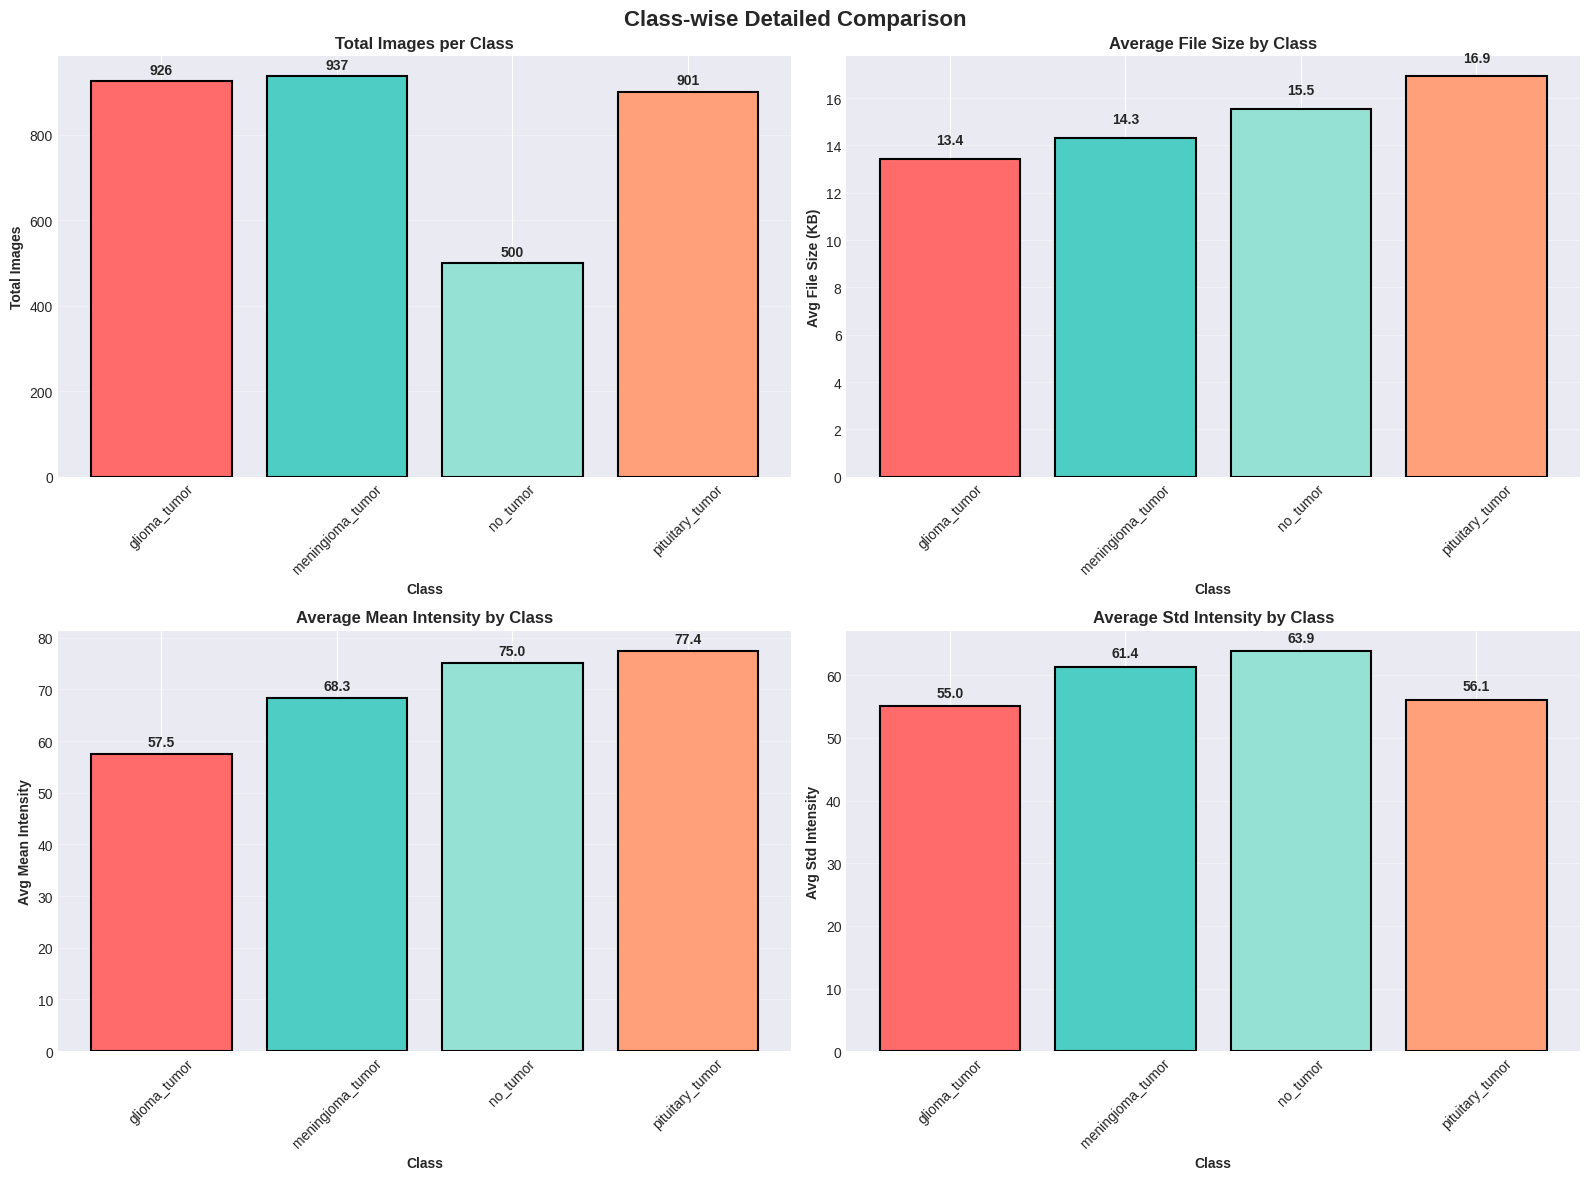

In [23]:
# Create a detailed comparison across all classes
print("\n" + "="*80)
print("CLASS-WISE DETAILED COMPARISON")
print("="*80)

# Prepare data for comparison
comparison_data = []

for class_name in TUMOR_CLASSES:
    class_df = df[df['class'] == class_name]

    comparison_data.append({
        'Class': class_name,
        'Total Images': len(class_df),
        'Training Images': len(class_df[class_df['split'] == 'Training']),
        'Testing Images': len(class_df[class_df['split'] == 'Testing']),
        'Avg File Size (KB)': round(class_df['file_size_kb'].mean(), 2),
        'Avg Mean Intensity': round(class_df['mean_intensity'].mean(), 2),
        'Avg Std Intensity': round(class_df['std_intensity'].mean(), 2),
        'Avg Min Intensity': round(class_df['min_intensity'].mean(), 2),
        'Avg Max Intensity': round(class_df['max_intensity'].mean(), 2)
    })

comparison_df = pd.DataFrame(comparison_data)

print("\nDetailed Class Comparison Table:")
print("-"*80)
print(comparison_df.to_string(index=False))

# Visualize the comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Class-wise Detailed Comparison', fontsize=16, fontweight='bold')

# 1. Total images per class
colors = [CLASS_COLORS[cls] for cls in comparison_df['Class']]
axes[0, 0].bar(comparison_df['Class'], comparison_df['Total Images'],
               color=colors, edgecolor='black', linewidth=1.5)
axes[0, 0].set_xlabel('Class', fontweight='bold')
axes[0, 0].set_ylabel('Total Images', fontweight='bold')
axes[0, 0].set_title('Total Images per Class', fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Total Images']):
    axes[0, 0].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# 2. Average file size
axes[0, 1].bar(comparison_df['Class'], comparison_df['Avg File Size (KB)'],
               color=colors, edgecolor='black', linewidth=1.5)
axes[0, 1].set_xlabel('Class', fontweight='bold')
axes[0, 1].set_ylabel('Avg File Size (KB)', fontweight='bold')
axes[0, 1].set_title('Average File Size by Class', fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Avg File Size (KB)']):
    axes[0, 1].text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. Average mean intensity
axes[1, 0].bar(comparison_df['Class'], comparison_df['Avg Mean Intensity'],
               color=colors, edgecolor='black', linewidth=1.5)
axes[1, 0].set_xlabel('Class', fontweight='bold')
axes[1, 0].set_ylabel('Avg Mean Intensity', fontweight='bold')
axes[1, 0].set_title('Average Mean Intensity by Class', fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Avg Mean Intensity']):
    axes[1, 0].text(i, v + 1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

# 4. Average std intensity
axes[1, 1].bar(comparison_df['Class'], comparison_df['Avg Std Intensity'],
               color=colors, edgecolor='black', linewidth=1.5)
axes[1, 1].set_xlabel('Class', fontweight='bold')
axes[1, 1].set_ylabel('Avg Std Intensity', fontweight='bold')
axes[1, 1].set_title('Average Std Intensity by Class', fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Avg Std Intensity']):
    axes[1, 1].text(i, v + 1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Training vs Testing Distribution


TRAINING VS TESTING DISTRIBUTION ANALYSIS


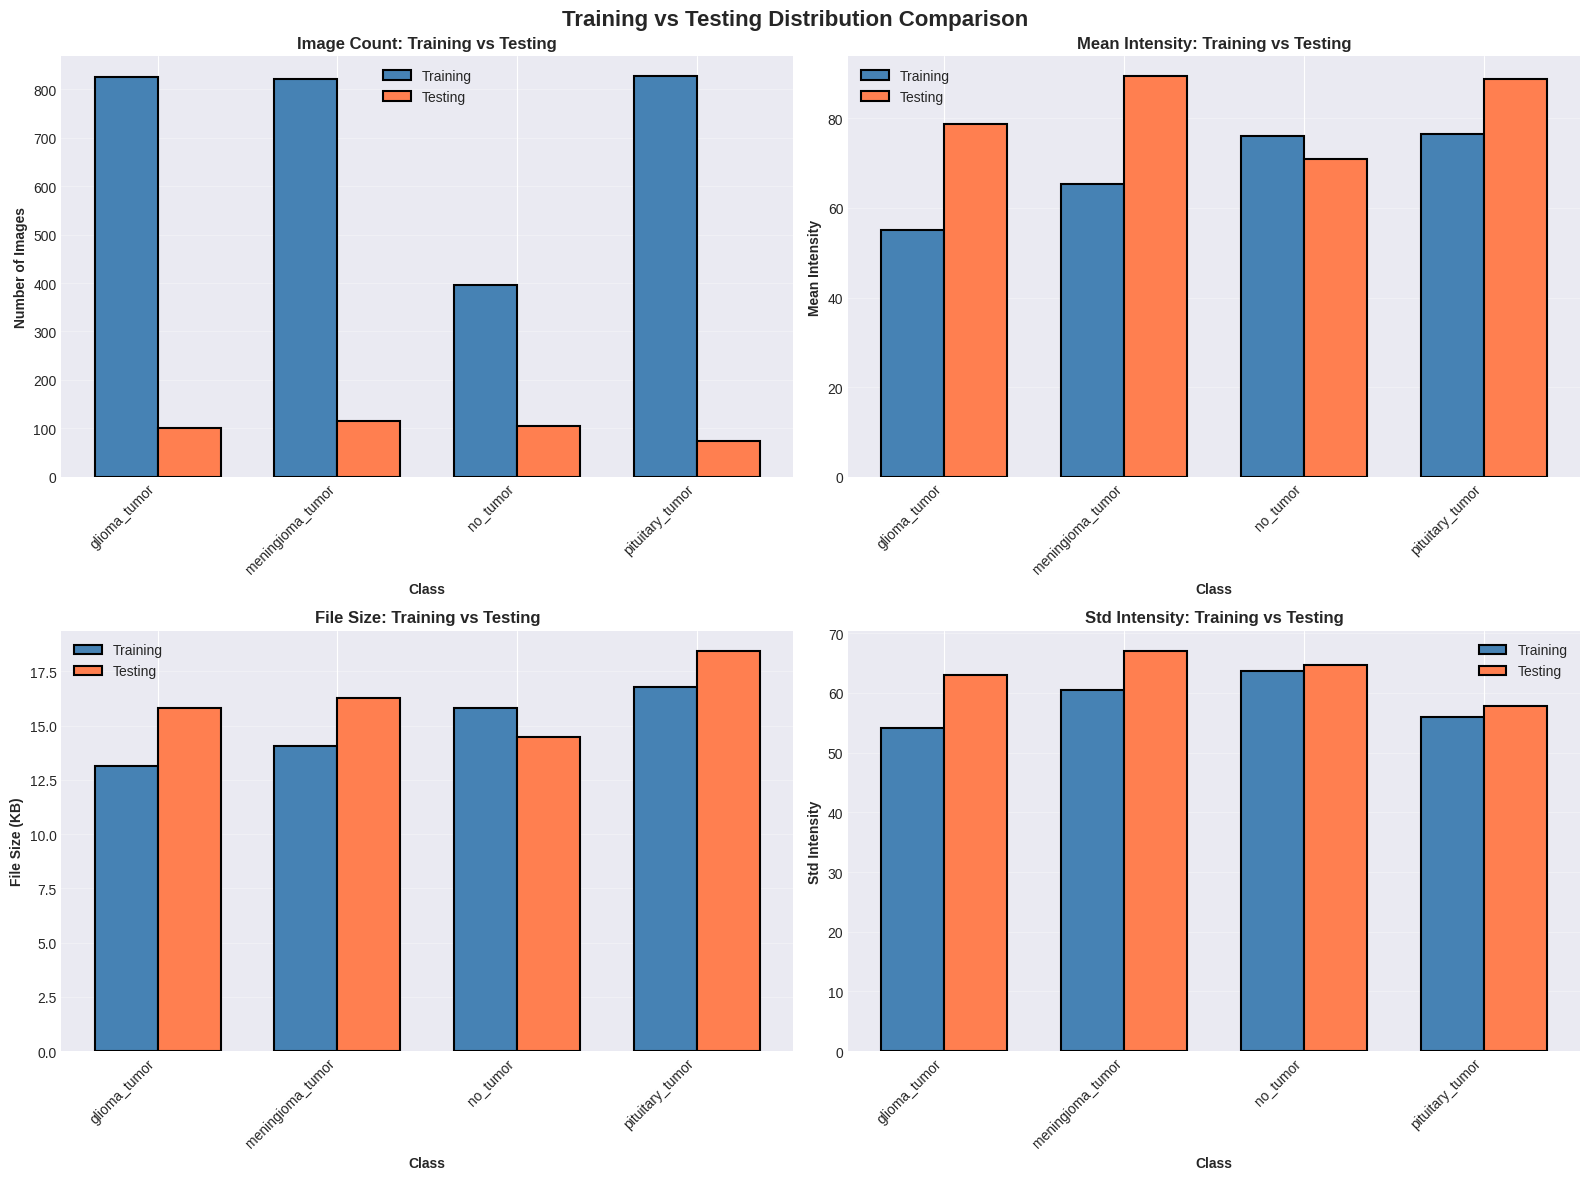

In [24]:
# Compare training and testing distributions
print("\n" + "="*80)
print("TRAINING VS TESTING DISTRIBUTION ANALYSIS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Training vs Testing Distribution Comparison', fontsize=16, fontweight='bold')

# 1. Class distribution comparison
train_counts = df[df['split'] == 'Training']['class'].value_counts()
test_counts = df[df['split'] == 'Testing']['class'].value_counts()

x = np.arange(len(TUMOR_CLASSES))
width = 0.35

axes[0, 0].bar(x - width/2, [train_counts.get(cls, 0) for cls in TUMOR_CLASSES],
               width, label='Training', color='steelblue', edgecolor='black', linewidth=1.5)
axes[0, 0].bar(x + width/2, [test_counts.get(cls, 0) for cls in TUMOR_CLASSES],
               width, label='Testing', color='coral', edgecolor='black', linewidth=1.5)
axes[0, 0].set_xlabel('Class', fontweight='bold')
axes[0, 0].set_ylabel('Number of Images', fontweight='bold')
axes[0, 0].set_title('Image Count: Training vs Testing', fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(TUMOR_CLASSES, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Mean intensity comparison
train_intensity = df[df['split'] == 'Training'].groupby('class')['mean_intensity'].mean()
test_intensity = df[df['split'] == 'Testing'].groupby('class')['mean_intensity'].mean()

axes[0, 1].bar(x - width/2, [train_intensity.get(cls, 0) for cls in TUMOR_CLASSES],
               width, label='Training', color='steelblue', edgecolor='black', linewidth=1.5)
axes[0, 1].bar(x + width/2, [test_intensity.get(cls, 0) for cls in TUMOR_CLASSES],
               width, label='Testing', color='coral', edgecolor='black', linewidth=1.5)
axes[0, 1].set_xlabel('Class', fontweight='bold')
axes[0, 1].set_ylabel('Mean Intensity', fontweight='bold')
axes[0, 1].set_title('Mean Intensity: Training vs Testing', fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(TUMOR_CLASSES, rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. File size comparison
train_size = df[df['split'] == 'Training'].groupby('class')['file_size_kb'].mean()
test_size = df[df['split'] == 'Testing'].groupby('class')['file_size_kb'].mean()

axes[1, 0].bar(x - width/2, [train_size.get(cls, 0) for cls in TUMOR_CLASSES],
               width, label='Training', color='steelblue', edgecolor='black', linewidth=1.5)
axes[1, 0].bar(x + width/2, [test_size.get(cls, 0) for cls in TUMOR_CLASSES],
               width, label='Testing', color='coral', edgecolor='black', linewidth=1.5)
axes[1, 0].set_xlabel('Class', fontweight='bold')
axes[1, 0].set_ylabel('File Size (KB)', fontweight='bold')
axes[1, 0].set_title('File Size: Training vs Testing', fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(TUMOR_CLASSES, rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Std intensity comparison
train_std = df[df['split'] == 'Training'].groupby('class')['std_intensity'].mean()
test_std = df[df['split'] == 'Testing'].groupby('class')['std_intensity'].mean()

axes[1, 1].bar(x - width/2, [train_std.get(cls, 0) for cls in TUMOR_CLASSES],
               width, label='Training', color='steelblue', edgecolor='black', linewidth=1.5)
axes[1, 1].bar(x + width/2, [test_std.get(cls, 0) for cls in TUMOR_CLASSES],
               width, label='Testing', color='coral', edgecolor='black', linewidth=1.5)
axes[1, 1].set_xlabel('Class', fontweight='bold')
axes[1, 1].set_ylabel('Std Intensity', fontweight='bold')
axes[1, 1].set_title('Std Intensity: Training vs Testing', fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(TUMOR_CLASSES, rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Final EDA Summary Report